In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [170]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [175]:
from imblearn.over_sampling import SMOTE

In [224]:
import joblib

In [494]:
import datetime

In [287]:
%matplotlib inline
#%matplotlib notebook

In [271]:
import seaborn as sns

In [3]:
df = pd.read_excel('data.xlsx')

In [4]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0


In [5]:
df['from_area_id'].nunique()

598

In [6]:
df['from_area_id'].value_counts()

393.0     3858
571.0     1631
293.0     1052
585.0      911
1010.0     768
142.0      727
83.0       719
1384.0     628
1096.0     542
58.0       466
269.0      413
1026.0     395
625.0      370
1017.0     363
1330.0     362
689.0      341
768.0      334
271.0      333
1056.0     330
1371.0     327
1068.0     324
363.0      308
396.0      289
1021.0     279
1365.0     273
105.0      271
410.0      266
458.0      261
515.0      251
776.0      249
          ... 
1209.0       1
1277.0       1
1042.0       1
178.0        1
1158.0       1
1343.0       1
1164.0       1
483.0        1
802.0        1
1113.0       1
1215.0       1
1127.0       1
72.0         1
1253.0       1
384.0        1
770.0        1
1092.0       1
185.0        1
79.0         1
215.0        1
1235.0       1
68.0         1
138.0        1
369.0        1
1252.0       1
1178.0       1
1265.0       1
1345.0       1
1094.0       1
133.0        1
Name: from_area_id, Length: 598, dtype: int64

In [7]:
df['to_area_id'].value_counts()

393.0     8777
585.0     2339
1384.0    1237
571.0      664
293.0      555
1010.0     480
83.0       365
168.0      338
1371.0     332
452.0      330
142.0      326
1026.0     319
1068.0     313
572.0      310
1021.0     276
392.0      270
1192.0     234
1017.0     227
58.0       220
1096.0     217
768.0      200
271.0      195
136.0      187
1393.0     185
1330.0     180
625.0      179
455.0      172
269.0      166
1056.0     164
767.0      162
          ... 
1196.0       1
1302.0       1
133.0        1
1266.0       1
1042.0       1
301.0        1
174.0        1
1290.0       1
262.0        1
833.0        1
1369.0       1
17.0         1
428.0        1
1113.0       1
1118.0       1
1252.0       1
902.0        1
326.0        1
201.0        1
1356.0       1
1233.0       1
1201.0       1
215.0        1
1360.0       1
1124.0       1
1110.0       1
1207.0       1
644.0        1
1368.0       1
1127.0       1
Name: to_area_id, Length: 568, dtype: int64

In [8]:
df[df['from_area_id'] == 585]

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
87,132617,15485,85,NaN,2,585.0,1223.0,NaN,NaN,2013-01-03 10:45:00,NaT,1,0,2013-01-02 11:42:00,12.97677,77.5727,13.012419,77.555151,0
100,132631,33406,12,NaN,2,585.0,168.0,NaN,NaN,2013-01-02 16:00:00,NaT,0,0,2013-01-02 14:24:00,12.97677,77.5727,12.993130,77.598280,0
128,132664,21148,12,NaN,2,585.0,458.0,NaN,NaN,2013-01-02 21:45:00,NaT,0,0,2013-01-02 20:16:00,12.97677,77.5727,13.000370,77.727460,0
139,132675,12565,12,NaN,2,585.0,1166.0,NaN,NaN,2013-01-03 06:45:00,NaT,0,0,2013-01-02 21:58:00,12.97677,77.5727,12.997198,77.669514,0
144,132681,21941,85,NaN,2,585.0,112.0,NaN,NaN,2013-01-03 09:00:00,NaT,0,0,2013-01-03 07:36:00,12.97677,77.5727,12.933310,77.566660,0
145,132682,21967,23,NaN,2,585.0,271.0,NaN,NaN,2013-01-03 09:00:00,NaT,0,0,2013-01-03 07:41:00,12.97677,77.5727,12.956410,77.640760,0
185,132725,22063,12,NaN,2,585.0,767.0,NaN,NaN,2013-01-03 22:30:00,NaT,0,0,2013-01-03 17:49:00,12.97677,77.5727,12.912200,77.510430,0
219,132763,22311,12,NaN,2,585.0,458.0,NaN,NaN,2013-01-04 10:15:00,NaT,0,0,2013-01-04 09:36:00,12.97677,77.5727,13.000370,77.727460,0
220,132764,22312,12,NaN,2,585.0,1181.0,NaN,NaN,2013-01-04 10:30:00,NaT,0,0,2013-01-04 09:40:00,12.97677,77.5727,12.978960,77.673450,0
295,132862,22365,12,NaN,2,585.0,171.0,NaN,NaN,2013-01-05 07:45:00,NaT,0,0,2013-01-05 07:31:00,12.97677,77.5727,12.984790,77.661280,0


In [9]:
df[(df['from_area_id'] > 300) & (df['from_area_id'] < 400)]['from_area_id'].value_counts()

393.0    3858
363.0     308
396.0     289
392.0     242
353.0     215
330.0     181
344.0     140
339.0     130
376.0     114
357.0     102
373.0      87
308.0      78
352.0      62
391.0      61
358.0      40
367.0      34
334.0      29
362.0      27
356.0      20
398.0      19
355.0       5
321.0       4
328.0       3
326.0       3
369.0       1
384.0       1
Name: from_area_id, dtype: int64

In [10]:
df[(df['from_area_id'] > 400) & (df['from_area_id'] < 500)]['from_area_id'].nunique()

33

In [11]:
df.dtypes

id                              int64
user_id                         int64
vehicle_model_id                int64
package_id                    float64
travel_type_id                  int64
from_area_id                  float64
to_area_id                    float64
from_city_id                  float64
to_city_id                    float64
from_date              datetime64[ns]
to_date                datetime64[ns]
online_booking                  int64
mobile_site_booking             int64
booking_created        datetime64[ns]
from_lat                      float64
from_long                     float64
to_lat                        float64
to_long                       float64
Car_Cancellation                int64
dtype: object

In [12]:
df['booking_created'].sort_values()

0       2013-01-01 01:39:00
1       2013-01-01 02:25:00
2       2013-01-01 03:08:00
3       2013-01-01 04:39:00
4       2013-01-01 07:53:00
5       2013-01-01 08:01:00
6       2013-01-01 09:21:00
7       2013-01-01 09:39:00
8       2013-01-01 09:44:00
9       2013-01-01 09:49:00
10      2013-01-01 09:55:00
11      2013-01-01 09:59:00
12      2013-01-01 10:18:00
13      2013-01-01 11:17:00
14      2013-01-01 11:48:00
15      2013-01-01 11:52:00
16      2013-01-01 12:14:00
17      2013-01-01 12:17:00
18      2013-01-01 12:28:00
19      2013-01-01 12:42:00
20      2013-01-01 12:52:00
21      2013-01-01 13:40:00
22      2013-01-01 13:50:00
23      2013-01-01 14:39:00
24      2013-01-01 14:40:00
25      2013-01-01 14:56:00
26      2013-01-01 15:02:00
27      2013-01-01 15:07:00
28      2013-01-01 15:07:00
29      2013-01-01 15:11:00
                ...        
43401   2013-11-24 09:44:00
43402   2013-11-24 09:52:00
43403   2013-11-24 09:53:00
43404   2013-11-24 10:21:00
43405   2013-11-24 1

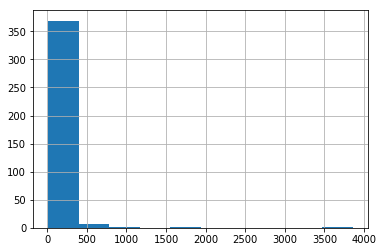

In [13]:
df['from_area_id'].value_counts().sort_values(ascending=False)[:50].hist()

In [14]:
x = df['from_area_id'].value_counts().sort_values(ascending=False)[:50].index
y = df['from_area_id'].value_counts().sort_values(ascending=False)[:50].values

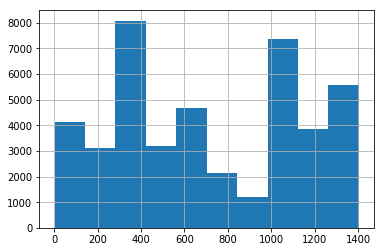

In [15]:
df['from_area_id'].hist()

In [16]:
def strip_time(t):
    return t.time()

df['booking_time'] = df['booking_created'].apply(strip_time)

In [17]:
def strip_date(d):
    return d.date()    

df['booking_date'] = df['booking_created'].apply(strip_date)

In [18]:
def strip_hour(h):
    return h.hour

df['booking_hour'] = df['booking_time'].apply(strip_hour)

In [19]:
df1 = df[df['travel_type_id'] == 1]
df2 = df[df['travel_type_id'] == 2]
df3 = df[df['travel_type_id'] == 3]

In [20]:
df2['booking_hour'].value_counts()

10    2411
11    2316
19    2238
20    2214
17    2167
16    2145
12    2137
15    2094
18    2083
14    1997
13    1938
22    1776
21    1758
9     1653
23    1306
8     1241
7      858
0      740
1      381
6      310
2      178
5      134
3      121
4       96
Name: booking_hour, dtype: int64

In [21]:
df1['booking_hour'].value_counts()

20    126
19    118
15    113
12    107
16    104
13    100
18     97
14     95
17     91
22     90
11     89
21     85
10     80
23     59
9      55
8      48
0      42
7      27
1      19
2      17
6      10
5       7
4       6
3       4
Name: booking_hour, dtype: int64

In [22]:
df3['booking_hour'].value_counts()

10    615
11    596
9     541
12    531
8     465
13    459
14    431
15    401
22    397
21    395
19    368
16    365
20    365
17    364
23    316
18    309
7     258
0     164
1      62
6      61
2      32
5      19
3      19
4      17
Name: booking_hour, dtype: int64

In [23]:
g21 = df2.groupby(['from_area_id', 'booking_hour'])

In [24]:
g21.get_group((2,1))

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,booking_time,booking_date,booking_hour
7561,141772,17870,24,NaN,2,2.0,393.0,NaN,NaN,2013-03-22 07:00:00,...,0,2013-03-22 01:05:00,12.99212,77.67218,13.19956,77.70688,0,01:05:00,2013-03-22,1
36954,177949,44690,12,NaN,2,2.0,393.0,15.0,NaN,2013-10-10 05:30:00,...,0,2013-10-09 01:20:00,12.99212,77.67218,13.19956,77.70688,0,01:20:00,2013-10-09,1


In [25]:
g21['id'].count().sort_values(ascending=False)

from_area_id  booking_hour
393.0         15              261
              19              230
              11              225
              18              220
              16              217
              14              207
              12              200
              20              197
              17              196
              13              187
              10              174
              21              164
              9               161
              22              155
              23              130
              8                99
571.0         19               94
              20               94
              16               84
              11               80
393.0         7                78
571.0         10               77
393.0         0                77
571.0         15               75
              18               75
              17               72
293.0         11               70
571.0         22               68
              9      

In [26]:
#The above data indicates the number of rides from a particular area in Bangaluru during a time of the day(by hour).

#We can clearly see there is a disprportionate number of booking from area_id 393 throughout the day.
#In case of driver's app, this location can be a busy zone where there is a higher chance of getting a ride.
#In case rider, he will be charged a surge price based on the availability of driver.

In [27]:
val = g21['id'].count().sort_values(ascending=False).values

In [28]:
uniqueValues, occurCount = np.unique(val, return_counts=True)

#uniqueValues stores unique values of the number of rides from a particular location during a caertain time of day(grouped by hour)
#occur count tells how many times does it happen there have been x rides from y location during z hour.
#occur count stores frequency count irrespective of the location and hour aggreagating all values.
#As an example, there have been 2419 rides where there is only one record of a ride from y location during z hour.
#On the other hand, there have been one such case where there were 261 rides from y location during z hour(area_id=393, booking_hour=15).


print('Total Rides from location in an hour', 'frequency')
for i in range(len(uniqueValues)):
    print(uniqueValues[i], '\t\t\t\t\t', occurCount[i])

Total Rides from location in an hour frequency
1 					 2419
2 					 1176
3 					 757
4 					 511
5 					 339
6 					 252
7 					 215
8 					 171
9 					 130
10 					 96
11 					 82
12 					 90
13 					 59
14 					 43
15 					 51
16 					 35
17 					 30
18 					 22
19 					 23
20 					 19
21 					 15
22 					 21
23 					 10
24 					 10
25 					 12
26 					 7
27 					 12
28 					 8
29 					 6
30 					 9
31 					 4
32 					 9
33 					 4
34 					 5
35 					 9
36 					 1
37 					 6
38 					 6
39 					 5
40 					 7
41 					 4
42 					 2
43 					 5
44 					 1
45 					 1
46 					 2
47 					 3
48 					 3
49 					 1
50 					 2
51 					 1
56 					 2
59 					 2
60 					 3
61 					 2
62 					 1
63 					 1
66 					 1
67 					 1
68 					 1
70 					 1
72 					 1
75 					 2
77 					 2
78 					 1
80 					 1
84 					 1
94 					 2
99 					 1
130 					 1
155 					 1
161 					 1
164 					 1
174 					 1
187 					 1
196 					 1
197 					 1
200 					 1
207 					 1
217 					 1
220 					 1
225 					 1
230 					 

In [29]:
df2[df2['Car_Cancellation'] == 1]

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,booking_time,booking_date,booking_hour
21,132536,16,28,NaN,2,58.0,1063.0,NaN,NaN,2013-01-01 18:30:00,...,0,2013-01-01 13:40:00,12.889630,77.601190,12.934477,77.611284,1,13:40:00,2013-01-01,13
64,132590,19322,12,NaN,2,515.0,186.0,NaN,NaN,2013-01-02 06:30:00,...,0,2013-01-02 00:41:00,12.978960,77.673450,12.802570,77.704530,1,00:41:00,2013-01-02,0
281,132840,22351,12,NaN,2,269.0,1371.0,NaN,NaN,2013-01-04 23:00:00,...,0,2013-01-04 20:52:00,12.974400,77.691830,13.000418,77.674835,1,20:52:00,2013-01-04,20
361,132949,22402,12,NaN,2,1371.0,1330.0,NaN,NaN,2013-01-05 23:15:00,...,0,2013-01-05 21:08:00,13.000418,77.674835,12.953434,77.706510,1,21:08:00,2013-01-05,21
523,133138,22495,12,NaN,2,238.0,768.0,NaN,NaN,2013-01-07 19:45:00,...,0,2013-01-07 19:18:00,12.937110,77.601710,12.989990,77.553320,1,19:18:00,2013-01-07,19
648,133287,22559,12,NaN,2,789.0,677.0,NaN,NaN,2013-01-09 15:30:00,...,0,2013-01-09 14:59:00,12.963400,77.603430,13.058450,77.640750,1,14:59:00,2013-01-09,14
744,133399,22646,28,NaN,2,571.0,451.0,NaN,NaN,2013-01-10 18:15:00,...,0,2013-01-10 16:48:00,12.951850,77.696420,12.973900,77.579140,1,16:48:00,2013-01-10,16
860,133541,22714,12,NaN,2,571.0,25.0,NaN,NaN,2013-01-11 19:00:00,...,0,2013-01-11 17:13:00,12.951850,77.696420,12.980590,77.574750,1,17:13:00,2013-01-11,17
1052,133775,22846,12,NaN,2,1071.0,1282.0,NaN,NaN,2013-01-13 13:30:00,...,0,2013-01-13 12:43:00,12.937585,77.694433,12.959687,77.747099,1,12:43:00,2013-01-13,12
1098,133833,41448,12,NaN,2,767.0,1384.0,NaN,NaN,2013-01-14 17:30:00,...,0,2013-01-13 20:21:00,12.912200,77.510430,13.028530,77.546250,1,20:21:00,2013-01-13,20


In [30]:
df2.corr()['Car_Cancellation']

id                     0.144063
user_id                0.111025
vehicle_model_id      -0.045991
package_id                  NaN
travel_type_id              NaN
from_area_id           0.018126
to_area_id             0.066097
from_city_id                NaN
to_city_id                  NaN
online_booking         0.151097
mobile_site_booking    0.068250
from_lat              -0.081685
from_long              0.050517
to_lat                -0.127294
to_long               -0.102121
Car_Cancellation       1.000000
booking_hour          -0.004523
Name: Car_Cancellation, dtype: float64

In [31]:
df2['user_id'].nunique()
#df2.groupby['']

18292

In [32]:
df_cancel = df2.copy()
df_cancel1 = df2[df2['Car_Cancellation'] == 1].copy()

In [33]:
temp_cancel = df_cancel.groupby('user_id')['Car_Cancellation'].count().to_frame().reset_index()
temp_cancel1 = df_cancel1.groupby('user_id')['Car_Cancellation'].count().to_frame().reset_index()

In [34]:
for i in temp_cancel1.values:
    #temp_cancel['Car_Cancellation'] = temp_cancel[temp_cancel['user_id'] == i[0]]['Car_Cancellation'] - i[1]
    print(temp_cancel[temp_cancel['user_id'] == i[0]]['Car_Cancellation'].values, i[0])

[2] 16
[1] 112
[1] 313
[1] 547
[1] 554
[4] 709
[6] 738
[2] 762
[5] 815
[1] 834
[8] 867
[189] 868
[1] 901
[3] 915
[2] 984
[1] 988
[19] 1154
[4] 1261
[5] 1649
[4] 1701
[1] 1784
[1] 1928
[11] 2065
[1] 2181
[6] 2257
[2] 2590
[4] 2616
[11] 2807
[3] 2858
[2] 3007
[7] 3128
[7] 3754
[15] 3859
[5] 3900
[1] 3904
[6] 3935
[1] 4010
[1] 4078
[1] 4144
[2] 4225
[3] 4826
[7] 4870
[1] 4958
[2] 5089
[2] 5181
[1] 5207
[4] 5322
[1] 5408
[1] 5571
[12] 5641
[14] 5666
[1] 5669
[2] 5757
[1] 6166
[2] 6184
[1] 6484
[1] 6530
[2] 6605
[1] 6796
[1] 6925
[1] 7015
[2] 7038
[1] 7053
[4] 7071
[1] 7309
[1] 7338
[2] 7528
[1] 7783
[2] 8111
[1] 8206
[5] 8245
[7] 8467
[2] 8507
[1] 8565
[2] 8820
[4] 8919
[1] 8989
[2] 9037
[1] 9199
[2] 9205
[21] 9314
[16] 9447
[4] 9506
[2] 9596
[6] 9661
[1] 9773
[2] 9829
[3] 12446
[3] 12550
[2] 12565
[1] 12587
[2] 12603
[5] 12735
[1] 12772
[13] 12849
[3] 13015
[6] 13103
[3] 13366
[7] 13413
[1] 13440
[2] 13450
[1] 13532
[1] 13558
[1] 13602
[6] 13613
[4] 13720
[1] 13854
[4] 13862
[1] 14089
[16

[1] 32308
[2] 32315
[1] 32316
[1] 32323
[7] 32329
[4] 32331
[1] 32333
[1] 32334
[1] 32336
[1] 32345
[1] 32346
[4] 32348
[1] 32355
[8] 32360
[4] 32362
[6] 32363
[1] 32398
[1] 32418
[1] 32419
[1] 32427
[1] 32436
[1] 32448
[1] 32450
[2] 32451
[1] 32452
[2] 32458
[1] 32462
[2] 32463
[1] 32466
[3] 32467
[1] 32468
[1] 32469
[1] 32470
[1] 32472
[1] 32474
[2] 32475
[5] 32476
[2] 32480
[1] 32481
[2] 32483
[1] 32484
[1] 32485
[1] 32486
[1] 32487
[1] 32490
[1] 32492
[1] 32497
[1] 32498
[1] 32503
[3] 32504
[1] 32505
[2] 32508
[1] 32512
[1] 32513
[1] 32514
[5] 32515
[1] 32518
[1] 32520
[2] 32521
[1] 32522
[1] 32524
[1] 32525
[1] 32526
[201] 32527
[2] 32533
[2] 32535
[3] 32537
[2] 32541
[2] 32544
[2] 32549
[1] 32557
[1] 32565
[1] 32570
[2] 32571
[1] 32574
[1] 32580
[1] 32583
[1] 32584
[7] 32586
[1] 32593
[1] 32597
[1] 32598
[1] 32602
[1] 32603
[1] 32607
[2] 32613
[1] 32615
[1] 32616
[1] 32618
[1] 32619
[1] 32621
[1] 32623
[2] 32625
[1] 32626
[1] 32629
[2] 32632
[1] 32636
[1] 32638
[3] 32640
[3] 3264

[2] 44673
[2] 44684
[1] 44685
[1] 44689
[1] 44691
[1] 44693
[1] 44739
[1] 44776
[1] 44779
[1] 44785
[1] 44804
[1] 44824
[1] 44825
[1] 44829
[2] 44830
[1] 44844
[1] 44856
[2] 44864
[1] 44866
[1] 44878
[1] 44882
[2] 44895
[3] 44903
[1] 44927
[1] 44928
[2] 44931
[1] 44935
[1] 44936
[1] 44938
[1] 44940
[1] 44945
[1] 44950
[2] 44954
[2] 44955
[3] 44960
[1] 44985
[3] 44990
[1] 45001
[1] 45002
[1] 45005
[2] 45008
[1] 45009
[1] 45032
[5] 45049
[2] 45050
[1] 45051
[1] 45054
[2] 45058
[1] 45060
[4] 45065
[1] 45066
[1] 45074
[1] 45082
[1] 45092
[1] 45109
[1] 45118
[1] 45123
[1] 45129
[1] 45133
[1] 45134
[1] 45136
[2] 45137
[1] 45138
[1] 45139
[1] 45145
[1] 45148
[2] 45150
[2] 45153
[1] 45161
[1] 45164
[1] 45179
[1] 45181
[1] 45185
[1] 45186
[1] 45191
[1] 45193
[1] 45194
[1] 45204
[1] 45210
[1] 45212
[1] 45213
[1] 45216
[2] 45217
[6] 45219
[2] 45222
[1] 45223
[1] 45224
[1] 45237
[1] 45240
[1] 45241
[1] 45244
[1] 45246
[1] 45247
[2] 45248
[1] 45250
[2] 45251
[3] 45255
[2] 45256
[1] 45258
[2] 45259


In [35]:
#Calculating difference of rides not cancelled and rides cancelled

l = []
for i in temp_cancel['user_id'].values:
    if i in temp_cancel1['user_id'].values:
        diff = temp_cancel[temp_cancel['user_id'] == i]['Car_Cancellation'].values[0] - temp_cancel1[temp_cancel1['user_id'] == i]['Car_Cancellation'].values[0]
        l.append(diff)
    else:
        l.append(temp_cancel[temp_cancel['user_id'] == i]['Car_Cancellation'].values[0])

In [36]:
temp_cancel['car_cancellation_difference'] = l

In [37]:
temp_cancel.shape

(18292, 3)

In [38]:
temp_cancel[temp_cancel['car_cancellation_difference'] == 0].shape

(1534, 3)

In [39]:
temp_cancel[temp_cancel['Car_Cancellation'] == 1].shape

(13251, 3)

In [40]:
temp_cancel.columns = ['user_id', 'total_rides', 'rides_taken']
temp_cancel['cars_cancelled'] = temp_cancel['total_rides'] - temp_cancel['rides_taken']

In [41]:
def pie(user):
    df_pie = temp_cancel[temp_cancel['user_id'] == user]        
    
    rides = [df_pie['rides_taken'], df_pie['cars_cancelled']]
    label = ['Rides Taken', 'Cancelled Rides']
    
    plt.pie(rides, labels=label, startangle=90, autopct='%.1f%%')

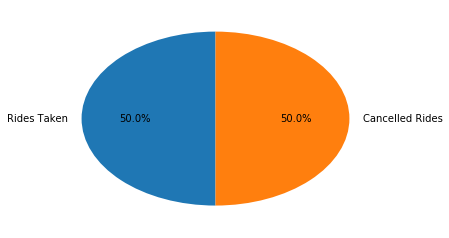

In [42]:
pie(16)

In [43]:
#Total user in the dataset: 18292
temp_cancel.shape

(18292, 4)

In [44]:
#Someone who cancelled all their rides
temp_cancel[temp_cancel['rides_taken'] == 0].shape

(1534, 4)

In [45]:
#People who only took one ride with their account
temp_cancel[temp_cancel['total_rides'] == 1].shape

(13251, 4)

In [46]:
#People who only took one ride with their account and that was also cancelled
temp_cancel[(temp_cancel['cars_cancelled'] == 1) & (temp_cancel['total_rides'] == 1)].shape

(1475, 4)

In [64]:
user_cancel = temp_cancel[(temp_cancel['cars_cancelled'] == 1) & (temp_cancel['total_rides'] == 1)]['user_id'].values

In [48]:
from_id_of_user_cancel = []
for i in user_cancel:
    from_id_of_user_cancel.append(df2[df2['user_id'] == i]['from_area_id'].values[0])

In [49]:
len(from_id_of_user_cancel)

1475

In [50]:
g2 = df2.groupby('from_area_id')

from_id_count = []

for i in from_id_of_user_cancel:
    from_id_count.append(g2.get_group(i)['Car_Cancellation'].count())

In [51]:
len(from_id_count)

1475

In [52]:
x = [i for i in from_id_count if i <50]

In [53]:
len(x)

337

In [54]:
#Calculating the total rides from a particular location
val_ct = g2['Car_Cancellation'].count().to_frame().reset_index()
val_ct.columns = ['from_area', 'value_count']

In [55]:
val_ct['value_count'].describe()

count     586.000000
mean       58.518771
std       169.025615
min         1.000000
25%         6.000000
50%        20.000000
75%        55.750000
max      3375.000000
Name: value_count, dtype: float64

In [56]:
#This denotes the number of rides from a locations with total rides less than 55
val_ct[val_ct['value_count'] < 56]['value_count'].sum()

7363

In [57]:
#Rides from location with rider frequency more than 55
val_ct[val_ct['value_count'] >= 56]['value_count'].sum()

26929

In [58]:
#Total rides
val_ct['value_count'].sum()

34292

In [61]:
7363/34292

0.2147148022862475

In [62]:
#Here we can clearly see locations with less than 56 rides contribute only 21% to the total ridership even after being a complete
#majority. with 75th quantile value lying at 55.75

In [68]:
#Checking ridership from user locations with one ride which was cancelled
user_cancel_df = temp_cancel[(temp_cancel['cars_cancelled'] == 1) & (temp_cancel['total_rides'] == 1)]

In [72]:
user_cancel_df.head()

,user_id,total_rides,rides_taken,cars_cancelled
21,112,1,0,1
31,313,1,0,1
52,547,1,0,1
53,554,1,0,1
89,834,1,0,1


In [75]:
user_cancel_df['from_area'] = from_id_of_user_cancel
user_cancel_df['from_area_count'] = from_id_count

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
val_ct.head()

,from_area,value_count,from_area_rides_value_assign
0,2.0,25,1
1,6.0,6,1
2,15.0,6,1
3,16.0,4,1
4,22.0,18,1


In [82]:
#Alloting a value (0 or 1) based on if total rides from a location are more or less than a particular value
def val_ct_binary(x):
    if x < 56:
        return 1
    else:
        return 0

In [83]:
val_ct['from_area_rides_value_assign'] = val_ct['value_count'].apply(val_ct_binary)

In [87]:
ride_val = []
for i in user_cancel_df['from_area']:
    ride_val.append(val_ct[val_ct['from_area'] == i]['from_area_rides_value_assign'].values[0])

In [91]:
user_cancel_df['from_area_rides_value_assign'] = ride_val.copy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
user_cancel_df['from_area_rides_value_assign'].sum()

399

In [99]:
user_cancel_df.shape[0]

1475

In [100]:
399/1475

0.2705084745762712

In [101]:
#Here, we can see there is a 7% increase in cancellation from areas were rides are less than 55 i.e the 75% quantile mark.
#Some, possiible and most probable reasons for this may be either the unavailability of vehicles in these location or longer waiting time.

In [108]:
#Verifying the above hypothesis on the entire cancellation data
df_cancel1

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,booking_time,booking_date,booking_hour
21,132536,16,28,NaN,2,58.0,1063.0,NaN,NaN,2013-01-01 18:30:00,...,0,2013-01-01 13:40:00,12.889630,77.601190,12.934477,77.611284,1,13:40:00,2013-01-01,13
64,132590,19322,12,NaN,2,515.0,186.0,NaN,NaN,2013-01-02 06:30:00,...,0,2013-01-02 00:41:00,12.978960,77.673450,12.802570,77.704530,1,00:41:00,2013-01-02,0
281,132840,22351,12,NaN,2,269.0,1371.0,NaN,NaN,2013-01-04 23:00:00,...,0,2013-01-04 20:52:00,12.974400,77.691830,13.000418,77.674835,1,20:52:00,2013-01-04,20
361,132949,22402,12,NaN,2,1371.0,1330.0,NaN,NaN,2013-01-05 23:15:00,...,0,2013-01-05 21:08:00,13.000418,77.674835,12.953434,77.706510,1,21:08:00,2013-01-05,21
523,133138,22495,12,NaN,2,238.0,768.0,NaN,NaN,2013-01-07 19:45:00,...,0,2013-01-07 19:18:00,12.937110,77.601710,12.989990,77.553320,1,19:18:00,2013-01-07,19
648,133287,22559,12,NaN,2,789.0,677.0,NaN,NaN,2013-01-09 15:30:00,...,0,2013-01-09 14:59:00,12.963400,77.603430,13.058450,77.640750,1,14:59:00,2013-01-09,14
744,133399,22646,28,NaN,2,571.0,451.0,NaN,NaN,2013-01-10 18:15:00,...,0,2013-01-10 16:48:00,12.951850,77.696420,12.973900,77.579140,1,16:48:00,2013-01-10,16
860,133541,22714,12,NaN,2,571.0,25.0,NaN,NaN,2013-01-11 19:00:00,...,0,2013-01-11 17:13:00,12.951850,77.696420,12.980590,77.574750,1,17:13:00,2013-01-11,17
1052,133775,22846,12,NaN,2,1071.0,1282.0,NaN,NaN,2013-01-13 13:30:00,...,0,2013-01-13 12:43:00,12.937585,77.694433,12.959687,77.747099,1,12:43:00,2013-01-13,12
1098,133833,41448,12,NaN,2,767.0,1384.0,NaN,NaN,2013-01-14 17:30:00,...,0,2013-01-13 20:21:00,12.912200,77.510430,13.028530,77.546250,1,20:21:00,2013-01-13,20


In [109]:
ride_val = []
for i in df_cancel1['from_area_id']:
    ride_val.append(val_ct[val_ct['from_area'] == i]['from_area_rides_value_assign'].values[0])

In [111]:
df_cancel1['from_area_rides_value_assign'] = ride_val
df_cancel1['from_area_rides_value_assign'].sum()

744

In [112]:
df_cancel1.shape

(2775, 23)

In [113]:
744/2775

0.2681081081081081

In [115]:
#Hence, our hypothesis which was only based on users who only took one ride and cancelled it too has been proved.
#For locations, with rides less than  55 i.e the 75th quantile, the users cancelled more than one fourth of their rides(26.8%)
#The total rides from these location contributed only 20% towards the total ridership and the cancellation here have been higher.


#Hence, by providing better services in locations with lower ridership, the company can reduce cancellations.

In [118]:
all_users = df2['user_id'].unique()

In [131]:
g22 = df2.groupby('user_id')

ride_5 = []  #The fifth previous ride i.e the ride five rides before the current ride cancellation indicator
ride_4 = []
ride_3 = []
ride_2 = []
ride_1 = []  #The previous ride

hour_5 = []  ##The fifth previous ride i.e the ride five rides before the current ride booking hour indicator
hour_4 = []
hour_3 = []
hour_2 = []
hour_1 = []  #Hour of previous ride

user_id_list = []
area_id = []
car_cancel = []

for i in all_users:
    #print(i)
    temp_df = g22.get_group(i)
    
    temp_store_cancel = []
    temp_store_booking_hour = []
    
    shape_of_temp = temp_df.shape[0]
    remaining = 5 - shape_of_temp + 1 #+1 because we will be predicting value for the last term
    
    temp_store_cancel.extend(temp_df['Car_Cancellation'].values[:-1])
    temp_store_booking_hour.extend(temp_df['booking_hour'].values[:-1])
        
    remaining_cancel = [0]*remaining
    temp_store_cancel.extend(remaining_cancel)
    
    
    
    remaining_hour = [-1]*remaining #Here hour will be added as 1. Suppose time of booking was 10 AM. It will now show 11 and for no booking it will show 0
    temp_store_booking_hour.extend(remaining_hour)
    
    area_id.append(temp_df['from_area_id'].values[-1])
    user_id_list.append(i)
    car_cancel.append(temp_df['Car_Cancellation'].values[-1])
    
    ride_1.append(temp_store_cancel[0])
    ride_2.append(temp_store_cancel[1])
    ride_3.append(temp_store_cancel[2])
    ride_4.append(temp_store_cancel[3])
    ride_5.append(temp_store_cancel[4])
    
    hour_1.append(temp_store_booking_hour[0])
    hour_2.append(temp_store_booking_hour[1])
    hour_3.append(temp_store_booking_hour[2])
    hour_4.append(temp_store_booking_hour[3])
    hour_5.append(temp_store_booking_hour[4])

22177
21413
22178
13034
22180
17712
22181
22184
4941
17037
22185
22186
16
15097
761
17226
868
21558
22193
20430
22194
21716
38966
12973
22196
8327
22200
22202
20340
97
22203
26940
22206
819
22208
17905
403
22209
22210
22211
22212
3859
22213
22214
3316
39439
22216
22217
19469
15815
21903
19545
7500
22221
18675
19322
12827
22223
15611
25413
21235
22226
22227
22230
21333
22232
22233
15485
22235
22234
22238
18521
1112
22239
22240
19387
22242
33406
5606
22243
22245
22248
22249
22250
20916
22251
5135
9372
22252
70
592
16903
16868
22254
22255
33542
22257
22259
21148
1649
17888
21761
22260
21050
22261
22262
22263
2380
22264
12565
22265
22266
18150
22267
21941
21967
22268
22271
4227
22272
55
22273
22274
1290
22276
21995
22277
21343
22278
22279
22280
22281
2858
22282
22283
22285
15676
22286
22378
22288
22289
22290
21577
22291
22063
22293
22294
1154
18372
5761
694
22297
22298
22300
4865
9506
16329
22301
22302
18096
22303
1186
22304
22305
22306
22307
59
603
20819
22309
21666
22311
22312
21323
2010

8908
23681
23683
23684
23685
23686
23690
3367
23691
23694
19073
23696
23698
23699
18478
23702
23703
2844
23706
23708
23710
23711
3850
23712
4828
8206
23709
18674
23714
23715
23716
23718
2126
23720
23721
23722
23723
17826
15537
23730
22764
23732
1643
23734
23735
23736
23737
23739
23740
17923
23743
15668
23744
23363
23746
23747
23748
16060
23749
24462
23755
9722
23758
23760
23766
23767
18655
23770
23773
23774
23776
23777
23778
21076
23783
23785
21562
23440
23786
23790
23791
23793
670
23795
23797
23798
36021
23800
23801
23802
23804
23805
23806
23808
23811
18910
441
19633
23835
21768
14673
23817
23819
23820
23782
23821
23822
23823
23824
23826
23829
23830
35459
23832
23833
23834
23838
23839
14407
23842
17061
22727
23845
23846
23847
23848
23851
23852
23853
23854
23855
23856
23859
23860
23862
23863
23865
16935
23866
23867
23868
23870
23871
23872
23875
23876
23877
23878
23879
23881
38021
23884
704
19276
25852
23887
23888
23889
23890
23891
23892
23894
23023
20311
23896
22766
7458
23897
23898
23

25444
12427
25445
25446
7164
8366
25450
25453
25454
25455
24857
25427
25456
25457
25458
8608
25461
25463
25467
646
20861
25469
12686
1776
25472
23154
25473
25253
25475
25476
25477
661
25478
25479
25482
25063
25481
19085
25483
16954
25485
25488
25883
25498
25500
25501
25509
25503
25504
25507
25506
25505
2325
25508
37102
25512
13681
25513
18875
13705
25516
25517
25518
25519
25520
25521
8477
16286
25525
25527
25528
25531
25529
9552
25533
1590
25534
758
25538
25540
15309
25541
25544
25546
25545
25547
25551
14734
25553
5641
25556
3631
25558
18817
25561
25563
17528
25565
25568
41064
25569
25570
25571
25572
25577
25578
25580
25582
12967
17978
25584
25586
25590
25591
3291
25597
25599
25600
25601
35486
25603
25604
3007
25605
25607
17039
25608
19251
25609
18114
25613
25614
25616
25617
25618
25619
25620
22333
25625
6166
24477
25100
25630
25632
25633
25634
25636
20019
25640
17543
25643
25645
24665
25648
25499
25651
25656
25657
25659
25660
25661
25664
25666
25667
16818
25668
19017
25669
25671
17128

27722
20436
27723
5272
27724
27725
27557
27726
27729
27730
27732
27735
27737
27742
27743
27745
41145
27747
28643
18606
27748
27752
14256
27753
27755
27756
20593
27759
27761
27762
32641
40464
27763
27766
27767
12471
27770
21892
14706
27774
27773
8188
27776
27777
27778
27780
27781
27782
38559
27786
20981
22551
27788
27787
27790
27791
27794
27799
27800
27802
37304
27804
27806
27809
27810
27811
27812
27815
27816
27817
6197
9633
26426
27819
27820
27821
27823
27824
27825
27830
27831
27832
27835
27836
20563
13085
27841
27289
15578
27844
27846
27847
25297
27848
27849
27850
27852
27854
25952
27855
27857
17517
27859
27860
27861
27863
27865
27866
27867
27868
27874
27875
27877
27878
27879
31344
27883
27885
27554
26493
3828
26855
27890
27891
27897
27900
27901
27904
27905
27906
27908
27619
27909
2065
27911
27912
27914
27916
27917
27919
27922
27923
27925
27926
8579
27928
27929
13366
27931
27932
17685
27933
20826
27934
1870
27937
25093
25924
27940
27942
27943
27199
7424
27944
27945
27088
3132
24513
27

30019
30020
30021
30024
30026
30027
30030
30032
30034
30035
30037
30038
30040
30039
30041
30045
30047
30048
30049
30051
30052
30053
30055
30058
30060
30064
6605
30066
30067
30068
18216
30069
30071
30079
30080
30082
30085
30086
30087
30089
30091
30092
30093
30094
30095
30096
30097
3212
30099
30100
30101
30102
30103
30105
30107
30108
30111
30112
30113
30115
12571
30117
30118
30119
2854
30124
30126
30843
30130
30131
30132
30134
30137
30138
30141
30142
30143
30146
27395
30149
30152
30153
30155
20969
30158
30159
30163
30164
30167
30168
21349
29736
30169
30170
30172
30173
9669
15755
30184
21430
30187
30186
30189
30191
29614
19688
30175
30197
30198
30199
30201
17044
29435
30203
30205
30207
30209
14728
30211
30216
6480
30217
30218
30221
30222
30223
30226
30227
30229
30231
30232
30234
30235
30236
30239
24647
30240
30242
30243
30245
15280
30247
30249
30250
30344
30253
30254
30031
30257
30258
30259
30265
30266
897
30268
30269
30270
30273
30275
30274
30277
30279
30495
30280
30281
30282
28934
12955

32300
32303
32304
32305
32307
32308
32309
32312
8806
32314
32315
32316
32323
6431
32324
32326
32325
32329
32332
32331
32333
32335
32336
32338
32341
14465
20927
32345
32346
32347
32350
32353
32354
1605
32355
32356
30736
32359
32360
32361
32362
32115
6870
4833
32366
32367
32368
32370
32371
32374
32375
36043
32377
32378
31951
32380
32381
32383
32389
32390
32392
32393
31695
32398
30944
36752
32404
32406
32407
32409
32411
32412
32413
31174
32415
8565
32417
32418
29610
32419
32422
32423
32425
32427
28420
32428
32430
32431
19409
32434
32436
32437
8111
32439
32441
32442
32444
32445
32446
32447
32448
32450
32451
32452
32454
32455
32456
32458
32459
32462
32463
32464
547
14937
32466
32467
28948
32468
32221
32469
32470
32471
32472
32473
32474
32476
32478
32477
41280
15411
32480
32481
24256
19209
32483
12729
32484
32485
32486
32487
32191
32490
32492
19165
32493
32495
32497
32498
32503
32504
32505
32509
32512
32513
32514
32518
32520
32521
32522
18226
32523
32524
32525
32527
32529
32531
4404
32502
32

34560
34561
34562
34564
34566
34567
34572
34574
34573
34577
34578
37
34579
34581
34582
16265
34583
34586
34588
36310
34596
34597
34598
34599
34600
34601
34604
34609
34568
34614
34615
34617
34621
34625
34623
34626
34627
34628
34631
34632
34633
34634
34635
34637
34640
34641
34645
34646
34647
34649
14726
34650
34651
34653
34654
34658
34659
34661
34662
34663
34664
34665
34669
34670
34672
34674
34677
34679
34681
34682
34683
34686
34687
34689
34693
34695
20996
34696
19498
34700
34701
34703
34705
34343
34709
34710
34711
34715
32496
34717
34718
34147
34719
34723
34630
34724
34725
9117
34726
34728
34732
34735
34736
34738
34737
34739
34741
34742
34743
34747
34750
34751
34753
34754
34755
34756
34757
20662
35753
34761
34764
34766
7944
34767
34768
34769
34774
34776
34777
34779
34784
34786
34787
34789
34790
34791
34792
34793
34797
34798
34799
34801
34804
34805
30395
34811
25144
34816
34817
34819
34820
34821
34823
34824
34825
34828
34829
34830
34831
34832
34833
34834
34836
21614
34840
34720
16673
376

36851
36852
36856
36857
22763
36858
36859
36860
36862
36864
36865
36868
36869
36870
36871
36872
37556
901
32768
36875
36697
36879
14370
36880
40231
36882
36883
36884
36885
36886
30930
36888
36889
36890
36893
36218
36894
36895
36897
36898
37520
36905
36903
36904
36906
36907
34956
36910
27853
36911
36912
36914
36915
36916
36918
36919
40776
36921
36922
36923
33243
32460
36925
32993
36926
36928
36929
36930
36931
35398
36932
36933
36935
36936
2202
36938
35139
20903
35544
36939
36940
36941
1511
36942
36945
36947
36950
36951
36954
36958
36961
36962
36966
36968
36967
36970
36971
36973
36974
36978
1851
36979
36980
36981
21347
36983
36985
36988
36990
36814
36991
36992
36995
36996
36994
36997
37000
37002
21445
31084
37004
37007
37008
37009
37010
37013
37014
37012
36781
37015
37016
37017
13113
37020
37022
35600
37023
29148
37024
37026
37028
37035
37030
37031
37032
37033
17523
37036
37038
37039
37040
37041
37042
37044
37046
37045
37047
37048
27734
37050
37052
37055
37056
37058
37060
37061
37062
370

39030
39031
35793
39032
39034
18197
39037
39038
39040
39041
39042
104
39047
39048
39049
36399
16396
40043
39052
39054
36548
39057
39059
39064
39065
39066
39070
39071
38984
39072
39073
39074
39075
39076
39077
39079
39082
39084
39085
39086
39089
39090
39092
39094
39095
39097
39096
20781
39099
39100
39103
39104
39105
39107
39108
39109
39111
39112
39113
39115
39116
39117
39118
39119
39122
39123
39124
39128
39129
39130
39132
39088
37146
39133
39134
39136
39137
39138
39140
39141
39144
39145
39147
39148
39149
39151
39152
7799
21284
39153
39156
39157
39158
39159
39160
39162
12488
39055
39163
39165
39167
39168
39170
39171
39172
39173
39174
39175
39176
39177
39178
39179
39182
39081
39184
39189
39191
39192
39193
39194
39195
39197
39198
39201
39203
39206
39208
39211
39212
39213
39214
39215
39216
39217
39218
39219
39223
39224
39225
39226
39228
39230
39231
39232
39234
39236
39237
39340
39241
39244
39246
39247
39249
39250
39252
39253
39254
39256
39257
39258
40850
39260
39262
39263
39264
39265
39266
3

41187
41188
41191
41192
41193
41195
41196
41198
41199
41201
31974
41203
24081
41207
41209
41210
41211
41213
41215
41217
41218
41219
41220
41221
41222
41223
41226
41227
41228
41229
41235
41236
41076
41238
41239
41241
41245
41246
41208
41248
41250
41253
41254
41256
41257
41259
41260
41261
41058
33760
41267
34606
41270
41271
41272
41276
41278
41281
41283
41284
41285
41286
41287
41288
41290
40753
41293
41297
41299
41300
41303
41306
41307
41308
41309
41310
41311
41312
41315
41317
41319
41320
41322
41323
41324
41314
41325
41326
41327
41328
41330
41331
22161
41332
41333
41334
41335
41336
41337
41338
41339
41340
41341
41342
33042
41347
41348
41349
41350
41352
41353
38540
41356
41359
41360
41366
41367
41369
41371
41373
41375
41377
41379
41381
41382
41384
41385
41387
41388
41391
37825
41398
28305
38054
41403
41404
21135
35230
41405
41407
41408
41409
41410
41411
41413
41414
41415
41417
41418
41419
41420
41421
41422
41423
41424
41428
41431
41432
41435
41438
41439
41440
41441
41442
41443
2782
12896

43472
43475
43476
43477
43481
43482
34530
43487
36055
43488
43492
43493
43494
43495
43498
43499
43500
43501
12442
43503
43507
43509
43510
43511
43512
43513
43515
43517
43518
43519
43520
43521
30904
43522
43523
43524
43525
43528
43531
43532
43533
43534
43537
43541
43543
42066
43544
43545
43547
43549
43550
43551
43552
43554
43556
43557
43559
43461
42871
43561
43563
43564
43565
43567
43568
43569
43570
43571
43572
43575
43576
43577
43578
43580
43582
43585
41389
43587
43588
43589
43590
43591
43592
43593
43594
43595
43596
43597
43599
43602
42205
43604
15216
43607
43611
43616
43618
43619
43411
43621
43622
43623
43624
43625
43628
3421
43629
40862
43630
43631
43634
43637
43640
43641
43642
41737
43643
43644
43645
40106
43646
43647
43649
43650
21901
43654
43655
43656
43658
43659
31334
43661
43663
43665
43666
43667
43669
43671
43673
43674
43675
43677
43678
43679
43684
43685
43687
43688
43689
43690
43691
43692
43694
43695
43697
43698
43699
43700
43184
43703
43705
43706
43709
43710
43712
43713
43716

45851
45853
45854
45855
32320
45857
45859
45160
45861
41052
45862
45863
45866
45867
45868
45870
45871
45872
45876
45877
45880
45881
45882
45884
45885
45886
45887
45890
45891
45893
45894
45896
45897
45898
45899
13302
45900
45901
45902
45903
45895
45904
45905
45906
45907
45908
45911
45912
45914
45916
45920
45921
45922
45923
45925
45927
45930
45931
45932
45933
45934
45935
45936
45938
45939
45942
45944
45945
45947
41913
45950
45951
45952
45953
45954
45956
45959
45961
45962
45963
45964
45966
45967
45969
45972
41939
45974
45975
45976
45977
45978
45979
45980
45983
45985
45986
45987
45989
45990
45991
45992
45993
45994
45996
45997
45999
46000
46001
46002
46003
46005
46006
46007
46009
46011
46012
46015
46017
46019
46022
46023
46024
46026
46028
46030
46033
46034
46035
46036
46038
46039
3191
46040
42665
46043
46047
46051
46052
46053
46054
46058
44505
46060
46062
46063
46064
46065
46066
46069
46070
43816
46072
45955
46074
7053
46075
46076
18590
46077
46079
46081
46082
46083
46087
46088
22445
46090


48262
48264
48265
48266
48269
48270
48271
2307
48274
48275
48276
48277
48278
48279
48280
48094
45612
1583
48281
48284
25431
42783
48287
48291
48292
48293
6281
48294
48299
48302
48303
48304
8989
48305
4252
48311
48313
48314
48316
48319
48320
48321
48323
48324
48325
48327
46726
48328
48329
48330
48331
48334
47084
48337
48338
48339
48340
48283
48342
48345
48346
48347
48350
48352
48353
48354
48356
48358
48360
48363
48366
48369
48285
48372
48341
48374
48376
48378
48380
48381
48389
48391
48393
48398
48400
48401
48402
48403
48407
48408
48409
48410
48411
48412
3656
48414
48415
48416
48417
48419
48421
48423
48425
48427
48429
15881
48430
48431
48432
48433
47866
48435
48436
48437
7932
48440
48441
48443
48444
48447
48449
48451
48452
48418
48453
48457
48458
48459
48463
48464
48467
48471
48472
48473
48474
45982
48475
48480
42399
48482
48483
48484
48485
48487
48488
48490
48489
48491
48493
17129
45284
48498
48501
48502
48503
48499
40535
48505
48508
48509
48511
48514
48515
48516
48519
48521
22860
43992

In [136]:
model_df_cancel = pd.DataFrame(columns=['user_id'])

In [139]:
model_df_cancel['user_id'] = user_id_list.copy()
model_df_cancel['from_area_id'] = area_id.copy()

model_df_cancel['ride1'] = ride_1.copy()
model_df_cancel['ride2'] = ride_2.copy()
model_df_cancel['ride3'] = ride_3.copy()
model_df_cancel['ride4'] = ride_4.copy()
model_df_cancel['ride5'] = ride_5.copy()

model_df_cancel['hour1'] = hour_1.copy()
model_df_cancel['hour2'] = hour_2.copy()
model_df_cancel['hour3'] = hour_3.copy()
model_df_cancel['hour4'] = hour_4.copy()
model_df_cancel['hour5'] = hour_5.copy()

In [140]:
model_df_cancel

,user_id,from_area_id,ride1,ride2,ride3,ride4,ride5,hour1,hour2,hour3,hour4,hour5
0,22177,83.0,0,0,0,0,0,-1,-1,-1,-1,-1
1,21413,1010.0,0,0,0,0,0,-1,-1,-1,-1,-1
2,22178,1301.0,0,0,0,0,0,-1,-1,-1,-1,-1
3,13034,768.0,0,0,0,0,0,-1,-1,-1,-1,-1
4,22180,1365.0,0,0,0,0,0,-1,-1,-1,-1,-1
5,17712,1323.0,0,0,0,0,0,8,-1,-1,-1,-1
6,22181,1192.0,0,0,0,0,0,-1,-1,-1,-1,-1
7,22184,516.0,0,0,0,0,0,-1,-1,-1,-1,-1
8,4941,150.0,0,0,0,0,0,-1,-1,-1,-1,-1
9,17037,1330.0,0,0,0,0,0,9,-1,-1,-1,-1


In [141]:
val_ct

,from_area,value_count,from_area_rides_value_assign
0,2.0,25,1
1,6.0,6,1
2,15.0,6,1
3,16.0,4,1
4,22.0,18,1
5,24.0,22,1
6,25.0,115,0
7,34.0,24,1
8,49.0,9,1
9,50.0,14,1


In [154]:
area_ct = []
for i in model_df_cancel['from_area_id']:
    print(i)
    area_ct.append(val_ct[val_ct['from_area'] == i]['value_count'].values[0])

83.0
1010.0
1301.0
768.0
1365.0
1323.0
1192.0
516.0
150.0
1330.0
1166.0
793.0
58.0
58.0
396.0
1353.0
150.0
450.0
142.0
61.0
1096.0
1237.0
61.0
137.0
1194.0
1283.0
1371.0
1017.0
793.0
168.0
1373.0
1021.0
413.0
1322.0
516.0
571.0
83.0
1323.0
974.0
393.0
393.0
363.0
1192.0
271.0
393.0
1295.0
1136.0
1033.0
392.0
145.0
1192.0
105.0
112.0
1037.0
1040.0
515.0
793.0
455.0
516.0
1032.0
217.0
344.0
571.0
1301.0
1223.0
963.0
1041.0
1224.0
499.0
58.0
339.0
393.0
353.0
1056.0
455.0
776.0
1384.0
571.0
601.0
479.0
1390.0
776.0
393.0
1186.0
793.0
353.0
1054.0
466.0
1036.0
1166.0
149.0
1010.0
293.0
167.0
352.0
171.0
83.0
1068.0
585.0
1133.0
567.0
392.0
1095.0
822.0
1371.0
1244.0
691.0
484.0
692.0
1166.0
156.0
1192.0
393.0
393.0
112.0
585.0
1083.0
1021.0
339.0
949.0
61.0
571.0
793.0
1384.0
571.0
585.0
1155.0
410.0
157.0
689.0
87.0
293.0
1150.0
450.0
758.0
1085.0
61.0
1388.0
220.0
689.0
393.0
151.0
25.0
410.0
767.0
1183.0
1237.0
167.0
977.0
471.0
949.0
1166.0
448.0
768.0
1378.0
1165.0
393.0
358.0
1038.0


393.0
463.0
393.0
488.0
105.0
1063.0
393.0
1157.0
142.0
590.0
1147.0
571.0
1224.0
330.0
1365.0
1322.0
142.0
393.0
585.0
776.0
393.0
171.0
1383.0
218.0
1297.0
25.0
420.0
393.0
410.0
1379.0
1384.0
391.0
994.0
393.0
330.0
1377.0
264.0
238.0
1165.0
1192.0
1098.0
142.0
171.0
1192.0
83.0
363.0
529.0
1032.0
187.0
1186.0
1086.0
112.0
1379.0
219.0
393.0
1317.0
393.0
1021.0
292.0
1377.0
1384.0
667.0
1089.0
1084.0
296.0
393.0
168.0
988.0
1142.0
271.0
1276.0
353.0
117.0
1321.0
396.0
1037.0
422.0
977.0
83.0
1056.0
1280.0
1017.0
1165.0
83.0
58.0
793.0
271.0
768.0
418.0
1059.0
1308.0
1175.0
238.0
1353.0
1178.0
87.0
156.0
455.0
953.0
730.0
293.0
1038.0
585.0
502.0
995.0
1337.0
393.0
570.0
184.0
585.0
1281.0
1238.0
814.0
520.0
1226.0
1194.0
58.0
142.0
150.0
1084.0
1375.0
269.0
793.0
1136.0
83.0
1365.0
363.0
542.0
1322.0
689.0
531.0
1248.0
393.0
393.0
1167.0
1365.0
1181.0
571.0
727.0
167.0
571.0
1021.0
293.0
363.0
150.0
83.0
601.0
1248.0
393.0
34.0
1063.0
393.0
968.0
51.0
1186.0
1099.0
1098.0
1357.0
758

571.0
393.0
571.0
1286.0
393.0
1130.0
1154.0
58.0
1237.0
51.0
585.0
1120.0
571.0
869.0
1384.0
1384.0
1305.0
601.0
115.0
1026.0
1323.0
1097.0
34.0
293.0
1058.0
410.0
478.0
1166.0
393.0
1192.0
1328.0
176.0
83.0
1237.0
1084.0
571.0
142.0
25.0
83.0
1371.0
393.0
722.0
1013.0
585.0
1373.0
681.0
363.0
1056.0
293.0
693.0
448.0
356.0
1120.0
61.0
376.0
571.0
112.0
393.0
1248.0
1052.0
1153.0
471.0
393.0
1270.0
105.0
171.0
571.0
1069.0
1056.0
344.0
58.0
463.0
585.0
1358.0
448.0
1121.0
571.0
542.0
410.0
585.0
585.0
142.0
1371.0
1032.0
572.0
1017.0
1196.0
269.0
1294.0
393.0
293.0
1056.0
458.0
1037.0
466.0
492.0
1087.0
1010.0
572.0
1107.0
1012.0
1096.0
561.0
949.0
1308.0
34.0
393.0
1038.0
393.0
1041.0
393.0
1384.0
1038.0
1165.0
376.0
585.0
1390.0
1038.0
1365.0
61.0
1390.0
61.0
1059.0
1384.0
1246.0
122.0
1086.0
58.0
1039.0
1286.0
463.0
1089.0
1384.0
731.0
793.0
271.0
585.0
87.0
83.0
147.0
1086.0
1054.0
601.0
1046.0
1281.0
424.0
1320.0
458.0
1198.0
571.0
1010.0
357.0
1084.0
1365.0
793.0
1039.0
1097.0
8

396.0
1153.0
585.0
1333.0
471.0
516.0
1244.0
293.0
1084.0
1154.0
1063.0
271.0
1032.0
1328.0
488.0
1337.0
601.0
945.0
363.0
949.0
105.0
393.0
393.0
832.0
363.0
974.0
1281.0
58.0
488.0
1167.0
353.0
393.0
1322.0
393.0
83.0
1310.0
667.0
1150.0
571.0
977.0
393.0
269.0
271.0
977.0
1085.0
767.0
693.0
822.0
572.0
585.0
352.0
953.0
1365.0
105.0
1147.0
1096.0
832.0
1315.0
1286.0
1384.0
572.0
142.0
105.0
83.0
1365.0
1010.0
393.0
1095.0
83.0
357.0
414.0
936.0
168.0
1169.0
393.0
448.0
541.0
373.0
396.0
571.0
763.0
1384.0
571.0
822.0
1390.0
58.0
515.0
561.0
1371.0
352.0
1367.0
793.0
722.0
502.0
393.0
1193.0
413.0
142.0
83.0
142.0
1367.0
142.0
1391.0
344.0
1145.0
625.0
1190.0
1367.0
1021.0
788.0
1367.0
793.0
142.0
308.0
396.0
1274.0
1375.0
580.0
1283.0
353.0
585.0
1333.0
1165.0
1096.0
52.0
293.0
601.0
455.0
1286.0
1034.0
1049.0
776.0
1365.0
1390.0
61.0
1037.0
393.0
466.0
1287.0
182.0
768.0
1026.0
1250.0
1373.0
271.0
339.0
358.0
1059.0
243.0
238.0
393.0
585.0
1040.0
601.0
393.0
1062.0
515.0
363.0
353.

832.0
393.0
542.0
393.0
492.0
136.0
1282.0
61.0
452.0
1038.0
1228.0
296.0
1166.0
1300.0
1021.0
367.0
625.0
1084.0
625.0
1154.0
393.0
171.0
945.0
1056.0
1096.0
793.0
1180.0
1371.0
1389.0
763.0
87.0
393.0
149.0
410.0
171.0
1384.0
1204.0
410.0
478.0
625.0
1330.0
677.0
571.0
1069.0
293.0
269.0
393.0
1264.0
1237.0
1038.0
1033.0
269.0
117.0
271.0
1108.0
693.0
585.0
393.0
484.0
1069.0
410.0
1021.0
2.0
142.0
1120.0
293.0
572.0
1330.0
25.0
142.0
393.0
142.0
142.0
271.0
393.0
1136.0
393.0
1147.0
1281.0
869.0
585.0
571.0
1038.0
1237.0
1244.0
1096.0
105.0
1340.0
1021.0
1282.0
1365.0
455.0
1017.0
119.0
1015.0
293.0
571.0
393.0
1010.0
22.0
450.0
142.0
637.0
149.0
1371.0
396.0
292.0
571.0
293.0
767.0
1075.0
1330.0
571.0
1383.0
1052.0
945.0
1084.0
1225.0
393.0
450.0
269.0
293.0
1375.0
293.0
585.0
846.0
585.0
571.0
1244.0
625.0
689.0
222.0
1220.0
1010.0
269.0
344.0
484.0
393.0
667.0
1175.0
393.0
601.0
410.0
22.0
171.0
609.0
1384.0
292.0
1192.0
293.0
393.0
1085.0
1323.0
128.0
1041.0
149.0
1384.0
471.0
4

130.0
572.0
789.0
1267.0
393.0
776.0
393.0
393.0
393.0
293.0
1330.0
1165.0
1391.0
571.0
873.0
625.0
1086.0
363.0
1097.0
52.0
1086.0
953.0
1061.0
1260.0
376.0
1192.0
1170.0
873.0
571.0
1224.0
793.0
1282.0
393.0
1214.0
393.0
356.0
974.0
293.0
142.0
376.0
1259.0
120.0
409.0
727.0
182.0
1159.0
393.0
1010.0
1010.0
182.0
693.0
1395.0
877.0
235.0
1154.0
393.0
768.0
1096.0
413.0
1096.0
1384.0
83.0
376.0
1021.0
1330.0
1192.0
105.0
1224.0
793.0
393.0
1068.0
571.0
396.0
393.0
1391.0
1062.0
767.0
1017.0
1205.0
1371.0
571.0
142.0
1285.0
1085.0
393.0
1261.0
1301.0
1357.0
571.0
488.0
1379.0
393.0
1173.0
1106.0
1061.0
171.0
689.0
571.0
1083.0
1281.0
776.0
1337.0
1143.0
1039.0
832.0
393.0
571.0
968.0
814.0
822.0
308.0
1365.0
1204.0
515.0
1166.0
61.0
1165.0
1371.0
117.0
1165.0
1147.0
768.0
625.0
105.0
768.0
601.0
269.0
61.0
363.0
1061.0
1092.0
1010.0
585.0
1351.0
1365.0
220.0
297.0
1261.0
1041.0
1286.0
571.0
112.0
571.0
1281.0
484.0
601.0
91.0
1308.0
130.0
832.0
1083.0
271.0
949.0
502.0
1181.0
1261.0
57

393.0
1114.0
1034.0
471.0
376.0
1010.0
393.0
142.0
393.0
330.0
667.0
1330.0
83.0
417.0
1166.0
83.0
455.0
945.0
571.0
1056.0
1096.0
393.0
977.0
1021.0
571.0
424.0
585.0
1032.0
1384.0
363.0
450.0
463.0
1388.0
1021.0
1041.0
571.0
1049.0
1084.0
1120.0
352.0
25.0
393.0
585.0
1095.0
824.0
122.0
393.0
1320.0
150.0
271.0
585.0
571.0
393.0
393.0
571.0
488.0
393.0
97.0
393.0
142.0
393.0
768.0
1180.0
1321.0
1226.0
61.0
269.0
142.0
271.0
83.0
1235.0
1262.0
1391.0
1142.0
571.0
691.0
1017.0
1037.0
1183.0
1005.0
61.0
585.0
1010.0
393.0
417.0
817.0
1173.0
184.0
218.0
105.0
1012.0
363.0
1384.0
393.0
1089.0
150.0
1010.0
767.0
393.0
1099.0
171.0
1338.0
353.0
83.0
1039.0
1327.0
149.0
1152.0
1096.0
1194.0
1039.0
1237.0
793.0
471.0
271.0
428.0
832.0
344.0
463.0
730.0
1010.0
1010.0
142.0
1371.0
572.0
1010.0
949.0
585.0
1357.0
1159.0
689.0
1165.0
1069.0
34.0
561.0
117.0
502.0
293.0
1390.0
515.0
484.0
1173.0
571.0
458.0
112.0
1038.0
83.0
542.0
1010.0
1244.0
393.0
1338.0
1026.0
776.0
1192.0
136.0
393.0
1280.0
3

601.0
1248.0
293.0
541.0
1328.0
145.0
1082.0
1056.0
34.0
393.0
293.0
471.0
1056.0
1153.0
1165.0
1190.0
212.0
1096.0
1074.0
393.0
220.0
271.0
1010.0
1056.0
1026.0
1082.0
142.0
393.0
1084.0
693.0
297.0
92.0
585.0
83.0
112.0
393.0
571.0
571.0
393.0
1045.0
515.0
450.0
603.0
625.0
1191.0
393.0
176.0
571.0
1283.0
393.0
1070.0
1299.0
1084.0
171.0
1136.0
186.0
1261.0
824.0
450.0
625.0
1071.0
168.0
768.0
1332.0
142.0
1207.0
1261.0
1373.0
1017.0
1181.0
1281.0
433.0
393.0
580.0
168.0
1237.0
25.0
585.0
393.0
1325.0
1155.0
1159.0
1085.0
585.0
559.0
168.0
767.0
977.0
339.0
1395.0
393.0
393.0
949.0
450.0
142.0
396.0
1391.0
414.0
1159.0
571.0
393.0
393.0
1333.0
763.0
393.0
1010.0
1304.0
1321.0
393.0
1010.0
1021.0
458.0
1086.0
1175.0
692.0
571.0
396.0
89.0
85.0
1054.0
1078.0
197.0
105.0
269.0
515.0
731.0
137.0
1109.0
936.0
363.0
625.0
104.0
455.0
213.0
151.0
168.0
516.0
393.0
1026.0
1294.0
142.0
977.0
849.0
768.0
1337.0
1357.0
1066.0
1342.0
455.0
1068.0
271.0
667.0
542.0
689.0
1332.0
502.0
1281.0
1205.

450.0
297.0
1166.0
625.0
1083.0
393.0
846.0
1223.0
136.0
393.0
1288.0
1056.0
1341.0
637.0
1054.0
218.0
1021.0
1248.0
1161.0
271.0
1182.0
1263.0
209.0
419.0
1010.0
363.0
515.0
136.0
1021.0
1063.0
1244.0
393.0
945.0
393.0
142.0
1017.0
393.0
297.0
410.0
949.0
1282.0
814.0
363.0
293.0
269.0
1096.0
450.0
1040.0
1120.0
1371.0
471.0
1101.0
414.0
763.0
1010.0
1374.0
271.0
112.0
393.0
520.0
450.0
89.0
398.0
571.0
572.0
413.0
458.0
1281.0
977.0
1323.0
571.0
187.0
814.0
1181.0
393.0
410.0
515.0
393.0
25.0
356.0
358.0
768.0
542.0
393.0
1026.0
977.0
572.0
220.0
393.0
1353.0
293.0
293.0
1384.0
1264.0
358.0
393.0
1228.0
1025.0
1222.0
1010.0
478.0
58.0
515.0
1026.0
1323.0
776.0
1034.0
516.0
142.0
968.0
571.0
112.0
1152.0
625.0
1192.0
1096.0
601.0
25.0
393.0
730.0
61.0
293.0
393.0
458.0
1192.0
667.0
1189.0
691.0
136.0
142.0
1180.0
171.0
422.0
590.0
413.0
393.0
949.0
393.0
393.0
571.0
393.0
339.0
1045.0
1021.0
502.0
1301.0
1078.0
1371.0
1384.0
977.0
293.0
171.0
392.0
1244.0
571.0
136.0
571.0
393.0
393.0

571.0
571.0
136.0
603.0
767.0
1391.0
269.0
1286.0
571.0
1056.0
168.0
1096.0
1282.0
768.0
798.0
763.0
691.0
1064.0
1085.0
974.0
269.0
156.0
968.0
2.0
149.0
590.0
238.0
571.0
1095.0
293.0
768.0
731.0
515.0
1384.0
393.0
1224.0
393.0
22.0
471.0
238.0
1282.0
1052.0
293.0
292.0
974.0
393.0
1388.0
601.0
1096.0
83.0
353.0
1237.0
531.0
1353.0
571.0
571.0
1250.0
1371.0
393.0
731.0
559.0
393.0
1185.0
585.0
393.0
1384.0
949.0
393.0
1064.0
590.0
1056.0
61.0
393.0
1089.0
575.0
516.0
1084.0
293.0
1281.0
466.0
936.0
1096.0
149.0
392.0
601.0
488.0
1390.0
1032.0
357.0
150.0
1008.0
488.0
1354.0
85.0
452.0
352.0
142.0
363.0
344.0
502.0
1102.0
150.0
1384.0
776.0
572.0
1005.0
393.0
450.0
722.0
1257.0
1037.0
1238.0
1033.0
768.0
768.0
293.0
105.0
393.0
1103.0
220.0
105.0
393.0
1320.0
1054.0
171.0
238.0
1357.0
824.0
1106.0
1070.0
1084.0
24.0
1270.0
1010.0
471.0
1098.0
1135.0
905.0
1228.0
1101.0
450.0
1189.0
1021.0
1096.0
776.0
1056.0
1384.0
1166.0
571.0
1306.0
115.0
1286.0
836.0
1320.0
115.0
1165.0
455.0
413.0

601.0
1096.0
172.0
393.0
293.0
1321.0
396.0
273.0
393.0
393.0
977.0
217.0
1399.0
1226.0
1384.0
1098.0
413.0
362.0
1330.0
393.0
977.0
420.0
1166.0
187.0
1084.0
585.0
1300.0
112.0
1061.0
393.0
515.0
61.0
1192.0
824.0
542.0
1371.0
137.0
89.0
1339.0
1384.0
585.0
1111.0
1383.0
410.0
1184.0
572.0
905.0
1330.0
1038.0
293.0
396.0
142.0
393.0
209.0
156.0
83.0
138.0
278.0
776.0
1053.0
142.0
571.0
393.0
994.0
1083.0
393.0
142.0
150.0
1062.0
571.0
585.0
1189.0
1032.0
968.0
571.0
206.0
393.0
141.0
83.0
293.0
393.0
1240.0
105.0
1189.0
85.0
1254.0
1218.0
1155.0
393.0
1232.0
1204.0
1026.0
466.0
89.0
293.0
393.0
1390.0
1186.0
1174.0
115.0
1069.0
1045.0
572.0
1191.0
571.0
791.0
330.0
393.0
112.0
1096.0
1320.0
1056.0
85.0
142.0
1189.0
1297.0
1063.0
271.0
150.0
1365.0
176.0
393.0
814.0
1084.0
1077.0
1010.0
977.0
297.0
1021.0
344.0
541.0
393.0
393.0
1056.0
269.0
1037.0
24.0
541.0
1165.0
571.0
393.0
776.0
393.0
85.0
1120.0
83.0
1333.0
168.0
585.0
1089.0
417.0
168.0
585.0
58.0
1038.0
1021.0
396.0
393.0
611.0

567.0
1375.0
1399.0
1034.0
393.0
1189.0
393.0
585.0
1384.0
572.0
1097.0
393.0
1097.0
466.0
1069.0
585.0
1076.0
391.0
105.0
1072.0
949.0
516.0
339.0
1040.0
1069.0
1390.0
1325.0
218.0
1017.0
393.0
1333.0
1171.0
330.0
450.0
373.0
1150.0
61.0
1120.0
1017.0
393.0
1056.0
83.0
1333.0
1333.0
1083.0
393.0
149.0
105.0
689.0
393.0
571.0
393.0
571.0
393.0
393.0
1341.0
466.0
1384.0
1089.0
393.0
393.0
1192.0
393.0
450.0
1368.0
1384.0
1038.0
393.0
1376.0
167.0
176.0
330.0
1338.0
293.0
1371.0
730.0
293.0
171.0
1038.0
590.0
1301.0
393.0
1297.0
393.0
1353.0
458.0
1388.0
450.0
1391.0
171.0
292.0
393.0
216.0
571.0
1112.0
471.0
1192.0
25.0
105.0
396.0
344.0
393.0
450.0
571.0
452.0
776.0
393.0
1261.0
1037.0
1346.0
1317.0
393.0
1069.0
450.0
61.0
271.0
1243.0
393.0
1083.0
373.0
571.0
1021.0
292.0
393.0
585.0
1384.0
392.0
392.0
392.0
1330.0
1026.0
1089.0
393.0
776.0
1010.0
542.0
1089.0
776.0
625.0
393.0
330.0
393.0
1034.0
1183.0
1249.0
393.0
393.0
603.0
330.0
393.0
1032.0
136.0
112.0
396.0
1248.0
393.0
1056.0


67.0
1096.0
1254.0
1045.0
105.0
393.0
1237.0
393.0
393.0
219.0
776.0
393.0
531.0
1190.0
142.0
393.0
393.0
693.0
142.0
142.0
1096.0
393.0
450.0
393.0
852.0
824.0
814.0
768.0
1192.0
1205.0
1373.0
1384.0
1086.0
571.0
184.0
768.0
585.0
1096.0
1371.0
450.0
949.0
572.0
393.0
393.0
97.0
1330.0
1056.0
1010.0
1010.0
147.0
814.0
1106.0
603.0
1247.0
458.0
768.0
142.0
1089.0
1165.0
1165.0
142.0
61.0
1008.0
1371.0
393.0
83.0
1103.0
585.0
184.0
1010.0
353.0
571.0
458.0
353.0
1157.0
1226.0
1384.0
122.0
142.0
571.0
1083.0
393.0
488.0
1349.0
136.0
691.0
1269.0
149.0
625.0
934.0
83.0
393.0
1384.0
689.0
529.0
1056.0
1391.0
393.0
393.0
85.0
1058.0
798.0
450.0
1069.0
466.0
824.0
61.0
1021.0
393.0
1273.0
1169.0
1056.0
1280.0
393.0
393.0
83.0
1398.0
1084.0
689.0
1038.0
585.0
1285.0
1102.0
1068.0
601.0
1257.0
1165.0
515.0
168.0
85.0
168.0
1010.0
1398.0
25.0
1269.0
1089.0
603.0
458.0
585.0
575.0
1223.0
505.0
977.0
1136.0
396.0
1226.0
814.0
61.0
1373.0
1391.0
1273.0
115.0
1145.0
392.0
83.0
1384.0
585.0
142.0
10

In [155]:
model_df_cancel['area_count'] = area_ct
model_df_cancel['car_cancellation'] = car_cancel

In [145]:
def add_1(h):
    return h+1

model_df_cancel['hour1'] = model_df_cancel['hour1'].apply(add_1)
model_df_cancel['hour2'] = model_df_cancel['hour2'].apply(add_1)
model_df_cancel['hour3'] = model_df_cancel['hour3'].apply(add_1)
model_df_cancel['hour4'] = model_df_cancel['hour4'].apply(add_1)
model_df_cancel['hour5'] = model_df_cancel['hour5'].apply(add_1)

In [827]:
df2[df2['from_area_id'] == 83]['id'].count()

556

In [156]:
model_df_cancel

,user_id,from_area_id,ride1,ride2,ride3,ride4,ride5,hour1,hour2,hour3,hour4,hour5,area_count,car_cancellation
0,22177,83.0,0,0,0,0,0,0,0,0,0,0,556,0
1,21413,1010.0,0,0,0,0,0,0,0,0,0,0,557,0
2,22178,1301.0,0,0,0,0,0,0,0,0,0,0,95,0
3,13034,768.0,0,0,0,0,0,0,0,0,0,0,272,0
4,22180,1365.0,0,0,0,0,0,0,0,0,0,0,198,0
5,17712,1323.0,0,0,0,0,0,9,0,0,0,0,98,0
6,22181,1192.0,0,0,0,0,0,0,0,0,0,0,146,0
7,22184,516.0,0,0,0,0,0,0,0,0,0,0,79,0
8,4941,150.0,0,0,0,0,0,0,0,0,0,0,99,0
9,17037,1330.0,0,0,0,0,0,10,0,0,0,0,279,0


In [161]:
x = model_df_cancel.drop(['user_id', 'car_cancellation'], 1)
y = model_df_cancel['car_cancellation']

In [216]:
#Applying this to resolve class imbalance
sm = SMOTE()
x_res, y_res = sm.fit_resample(x,y)

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3)

In [218]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
pred_train = clf.predict(x_train)
pred = clf.predict(x_test)

In [220]:
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred))

0.7906110283159463
0.742483125383514


In [221]:
print(precision_score(y_train, pred_train))
print(precision_score(y_test, pred))

0.7790668348045398
0.7373392282958199


In [222]:
print(recall_score(y_train, pred_train))
print(recall_score(y_test, pred))

0.8117554309740714
0.7518442622950819


In [223]:
print(f1_score(y_train, pred_train))
print(f1_score(y_test, pred))

0.7950752863455021
0.7445211038961039


In [226]:
modelname = 'cancellation_model.sav'
joblib.dump(clf, modelname)

['cancellation_model.sav']

In [251]:
x_test[0]

array([1069.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,   94.])

In [255]:
y_test[0]

1

In [254]:
clf.predict(x_test[0].reshape(1,-1))[0]

1

In [257]:
x_test[140]

array([1.341e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       2.100e+01, 2.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+01])

In [258]:
y_test[140]

0

In [259]:
clf.predict(x_test[140].reshape(1,-1))[0]

0

In [228]:
#The above model can be used to retain customer identiying which users are probably gonna cancel the ride.
#It will serve two benefits. One, it might notify XRides about the cancellation of ride where they can take proper actions in response.
#Second, it will save up costs to acquire new customer which is more expensive than retaining a customer.

In [232]:
g3 = df2.groupby(['from_area_id', 'booking_hour'])
g3.first()

id  user_id  vehicle_model_id  package_id  \
from_area_id booking_hour                                                  
2.0          1             141772    17870                24         NaN   
             2             137160    17870                12         NaN   
             3             180549    45923                12         NaN   
             8             151226    25729                12         NaN   
             9             158312    17870                12         NaN   
             10            142025    27010                12         NaN   
             11            149337    30968                12         NaN   
             12            147771    30130                12         NaN   
             13            174573     4954                12         NaN   
             15            134484    30991                12         NaN   
             16            167832    39970                12         NaN   
             17            147392     4954                12         NaN   
             18            137261    24697                12         NaN   
             20            143016    27281                12         NaN   
6.0          9             157461    22027                12         NaN   
             10            161820    37177                12         NaN   
             14            141100    33406                12         NaN   
             16            133538      743                12         NaN   
             18            158202      743                12         NaN   
             22            171779    41719                90         NaN   
15.0         8             152894    32869                12         NaN   
             9             141165     1489                 1         NaN   
             12            135391     4828                24         NaN   
             13            152943    32869                12         NaN   
             16            143758    25924                12         NaN   
16.0         15            168033    40064                12         NaN   
             19            139497    21704                12         NaN   
             23            137294    24714                12         NaN   
22.0         8             164508    38282                12         NaN   
             9             164940     6000                89         NaN   
...                           ...      ...               ...         ...   
1398.0       18            160609    36583                87         NaN   
             20            162128     3857                12         NaN   
             22            185284    48403                12         NaN   
1399.0       0             175611    37702                90         NaN   
             1             178189    37040                12         NaN   
             3             162169    30401                12         NaN   
             6             179652    45548                12         NaN   
             7             164195    38193                12         NaN   
             8             164203    37329                12         NaN   
             9             171594    18573                12         NaN   
             10            168177    40151                12         NaN   
             11            162553    37518                12         NaN   
             12            162575    18573                12         NaN   
             13            161244    29435                12         NaN   
             14            162067    29435                12         NaN   
             15            168250    29435                12         NaN   
             16            163005    23021                12         NaN   
             17            166942    39479                12         NaN   
             18            166455    37518                12         NaN   
             19            168317    40217                65         NaN   
   

In [363]:
val_ct_hr = g3['user_id'].count().to_frame().reset_index()
val_ct_hr.columns = ['from_area_id', 'booking_hour', 'count']
val_ct_hr

,from_area_id,booking_hour,count
0,2.0,1,2
1,2.0,2,1
2,2.0,3,1
3,2.0,8,2
4,2.0,9,2
5,2.0,10,3
6,2.0,11,1
7,2.0,12,1
8,2.0,13,1
9,2.0,15,2


In [264]:
val_ct_hr['count'].describe()

count    6752.000000
mean        5.078791
std        11.612287
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       261.000000
Name: count, dtype: float64

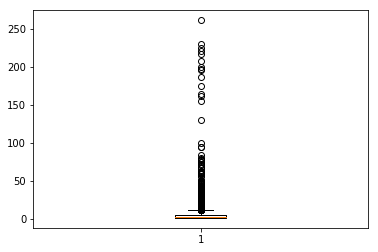

In [270]:
plt.boxplot(val_ct_hr['count'])
plt.show()

In [274]:
g4 = df2.groupby(['to_area_id'])

,from_area_id,booking_hour,count
0,2.0,1,2
1,2.0,2,1
2,2.0,3,1
3,2.0,8,2
4,2.0,9,2
5,2.0,10,3
6,2.0,11,1
7,2.0,12,1
8,2.0,13,1
9,2.0,15,2


In [277]:
from mpl_toolkits import mplot3d

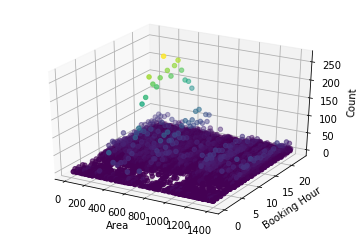

In [284]:
ax = plt.axes(projection='3d')

x = val_ct_hr['from_area_id']
y = val_ct_hr['booking_hour']
z = val_ct_hr['count']

ax.set_xlabel('Area')
ax.set_ylabel('Booking Hour')
ax.set_zlabel('Count')

ax.scatter3D(x, y, z, c=z)

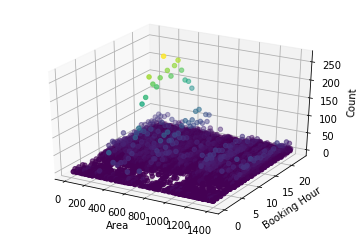

In [288]:
ax = plt.axes(projection='3d')

x = val_ct_hr['from_area_id']
y = val_ct_hr['booking_hour']
z = val_ct_hr['count']

ax.set_xlabel('Area')
ax.set_ylabel('Booking Hour')
ax.set_zlabel('Count')

ax.scatter3D(x, y, z, c=z)

In [289]:
df2[df2['booking_hour'] == 0]

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,booking_time,booking_date,booking_hour
64,132590,19322,12,NaN,2,515.0,186.0,NaN,NaN,2013-01-02 06:30:00,...,0,2013-01-02 00:41:00,12.978960,77.673450,12.802570,77.704530,1,00:41:00,2013-01-02,0
143,132679,22267,12,NaN,2,393.0,1044.0,NaN,NaN,2013-01-14 12:00:00,...,0,2013-01-03 00:52:00,13.199560,77.706880,12.968887,77.644329,0,00:52:00,2013-01-03,0
208,132751,22305,12,NaN,2,1153.0,393.0,NaN,NaN,2013-01-04 03:00:00,...,0,2013-01-04 00:10:00,12.871530,77.602060,13.199560,77.706880,0,00:10:00,2013-01-04,0
292,132858,22364,12,NaN,2,572.0,393.0,NaN,NaN,2013-01-05 03:30:00,...,0,2013-01-05 00:08:00,12.918730,77.614940,13.199560,77.706880,0,00:08:00,2013-01-05,0
376,132967,22415,12,NaN,2,83.0,1059.0,NaN,NaN,2013-01-06 01:15:00,...,0,2013-01-06 00:36:00,12.924150,77.672290,12.908810,77.631127,0,00:36:00,2013-01-06,0
535,133155,21931,12,NaN,2,293.0,393.0,NaN,NaN,2013-01-08 03:00:00,...,0,2013-01-08 00:08:00,12.849482,77.663187,13.199560,77.706880,0,00:08:00,2013-01-08,0
536,133156,22509,12,NaN,2,1085.0,455.0,NaN,NaN,2013-01-08 01:00:00,...,0,2013-01-08 00:24:00,12.911942,77.651582,12.999874,77.678120,0,00:24:00,2013-01-08,0
537,133157,12479,12,NaN,2,1096.0,455.0,NaN,NaN,2013-01-08 18:45:00,...,0,2013-01-08 00:51:00,12.965190,77.719320,12.999874,77.678120,0,00:51:00,2013-01-08,0
788,133456,22678,12,NaN,2,271.0,1102.0,NaN,NaN,2013-01-12 04:00:00,...,0,2013-01-11 00:01:00,12.956410,77.640760,12.936520,77.544810,0,00:01:00,2013-01-11,0
789,133457,15597,12,NaN,2,238.0,585.0,NaN,NaN,2013-01-11 05:30:00,...,0,2013-01-11 00:36:00,12.937110,77.601710,12.976770,77.572700,0,00:36:00,2013-01-11,0


In [290]:
df2['from_time'] = df2['from_date'].apply(strip_time)
df2['from_day'] = df2['from_date'].apply(strip_date)
df2['from_hour'] = df2['from_date'].apply(strip_hour)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [535]:
df2['week'] = df2['from_date'].dt.week

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [536]:
g5 = df2.groupby(['week', 'from_area_id', 'from_hour'])
val_ct_from = g5['user_id'].count().to_frame().reset_index()
val_ct_from.columns = ['week', 'from_area_id', 'start_hour', 'count']
val_ct_from.head()

,week,from_area_id,start_hour,count
0,1,25.0,7,1
1,1,25.0,19,1
2,1,58.0,7,1
3,1,58.0,12,1
4,1,58.0,17,1


In [545]:
week_no = []
area_id = []
b_hour = []
count = []

for i,row in val_ct_from.iterrows():
    c =int(row['count'])
    
    temp_w = row['week']
    temp_a = row['from_area_id']
    temp_h = row['start_hour']
    
    week_no.extend([temp_w] * c)
    area_id.extend([temp_a] * c)
    b_hour.extend([temp_h] * c)
    count.extend([c] * c)

In [539]:
dates = []

for i, j, k in g5.groups:
    print(i,j,k)
    temp_dates = g5.get_group((i,j,k))['from_date'].values
    dates.extend(temp_dates)

1 25.0 7
1 25.0 19
1 58.0 7
1 58.0 12
1 58.0 17
1 58.0 18
1 58.0 19
1 61.0 11
1 61.0 18
1 83.0 1
1 83.0 2
1 83.0 4
1 83.0 19
1 83.0 20
1 87.0 16
1 87.0 17
1 89.0 7
1 89.0 19
1 89.0 20
1 105.0 10
1 112.0 8
1 112.0 17
1 112.0 19
1 115.0 22
1 137.0 7
1 142.0 8
1 142.0 12
1 142.0 16
1 142.0 17
1 145.0 4
1 145.0 8
1 149.0 4
1 149.0 18
1 150.0 11
1 151.0 13
1 156.0 6
1 156.0 14
1 157.0 16
1 167.0 20
1 167.0 22
1 168.0 5
1 168.0 22
1 171.0 13
1 172.0 5
1 197.0 21
1 214.0 17
1 218.0 10
1 220.0 9
1 238.0 13
1 238.0 15
1 253.0 18
1 269.0 8
1 269.0 23
1 271.0 2
1 271.0 5
1 271.0 12
1 271.0 17
1 271.0 22
1 292.0 7
1 293.0 6
1 293.0 7
1 293.0 8
1 293.0 9
1 293.0 12
1 293.0 19
1 293.0 21
1 296.0 0
1 297.0 13
1 297.0 20
1 300.0 3
1 339.0 10
1 339.0 16
1 344.0 16
1 352.0 4
1 352.0 5
1 353.0 4
1 353.0 20
1 353.0 23
1 363.0 10
1 373.0 21
1 376.0 21
1 392.0 22
1 393.0 2
1 393.0 4
1 393.0 10
1 393.0 12
1 393.0 13
1 393.0 15
1 393.0 16
1 393.0 19
1 393.0 20
1 393.0 21
1 393.0 22
1 393.0 23
1 396.0 4
1 409.

3 393.0 20
3 393.0 21
3 393.0 22
3 393.0 23
3 396.0 2
3 396.0 12
3 396.0 14
3 410.0 14
3 410.0 17
3 413.0 11
3 413.0 23
3 414.0 4
3 414.0 19
3 422.0 4
3 422.0 14
3 432.0 14
3 433.0 0
3 433.0 5
3 433.0 7
3 433.0 18
3 433.0 20
3 433.0 23
3 448.0 3
3 450.0 4
3 450.0 8
3 450.0 14
3 450.0 21
3 450.0 23
3 451.0 9
3 452.0 6
3 455.0 3
3 455.0 6
3 455.0 9
3 455.0 15
3 455.0 22
3 458.0 17
3 458.0 21
3 463.0 5
3 463.0 7
3 463.0 8
3 463.0 20
3 466.0 6
3 466.0 19
3 466.0 21
3 467.0 15
3 471.0 3
3 471.0 19
3 484.0 2
3 484.0 11
3 484.0 15
3 492.0 23
3 499.0 9
3 502.0 3
3 515.0 11
3 515.0 23
3 516.0 9
3 516.0 17
3 516.0 19
3 525.0 21
3 540.0 4
3 541.0 17
3 542.0 5
3 542.0 17
3 542.0 21
3 559.0 10
3 561.0 5
3 570.0 13
3 571.0 0
3 571.0 2
3 571.0 3
3 571.0 4
3 571.0 5
3 571.0 7
3 571.0 9
3 571.0 11
3 571.0 14
3 571.0 16
3 571.0 20
3 572.0 18
3 585.0 5
3 585.0 6
3 585.0 7
3 585.0 12
3 585.0 14
3 585.0 22
3 601.0 20
3 625.0 0
3 625.0 6
3 625.0 9
3 625.0 15
3 625.0 16
3 625.0 17
3 625.0 20
3 667.0 2
3 667.

5 105.0 8
5 105.0 10
5 105.0 15
5 115.0 4
5 115.0 6
5 115.0 21
5 117.0 10
5 130.0 6
5 136.0 16
5 136.0 20
5 137.0 16
5 142.0 3
5 142.0 4
5 142.0 6
5 142.0 7
5 142.0 8
5 142.0 11
5 142.0 12
5 142.0 13
5 147.0 18
5 149.0 4
5 149.0 7
5 149.0 10
5 149.0 18
5 149.0 23
5 150.0 3
5 150.0 6
5 150.0 13
5 156.0 16
5 167.0 17
5 167.0 20
5 168.0 4
5 168.0 7
5 168.0 9
5 168.0 20
5 171.0 3
5 171.0 9
5 171.0 11
5 171.0 14
5 182.0 21
5 184.0 7
5 184.0 9
5 186.0 20
5 187.0 4
5 187.0 8
5 187.0 16
5 197.0 3
5 209.0 9
5 217.0 5
5 217.0 19
5 217.0 20
5 218.0 3
5 218.0 16
5 219.0 4
5 238.0 15
5 238.0 16
5 264.0 20
5 269.0 0
5 269.0 3
5 269.0 8
5 269.0 18
5 269.0 19
5 269.0 21
5 271.0 4
5 271.0 6
5 271.0 9
5 271.0 11
5 271.0 13
5 271.0 15
5 271.0 16
5 271.0 18
5 271.0 23
5 292.0 3
5 292.0 5
5 293.0 3
5 293.0 5
5 293.0 7
5 293.0 8
5 293.0 10
5 293.0 12
5 293.0 18
5 293.0 20
5 293.0 21
5 297.0 20
5 297.0 21
5 308.0 10
5 330.0 17
5 339.0 9
5 339.0 10
5 339.0 19
5 353.0 3
5 353.0 8
5 353.0 20
5 353.0 22
5 357.0 

6 1054.0 8
6 1056.0 3
6 1056.0 17
6 1056.0 18
6 1058.0 20
6 1059.0 6
6 1060.0 4
6 1061.0 5
6 1061.0 7
6 1061.0 18
6 1062.0 7
6 1063.0 6
6 1063.0 17
6 1063.0 20
6 1063.0 21
6 1064.0 22
6 1068.0 18
6 1068.0 21
6 1069.0 11
6 1069.0 17
6 1078.0 18
6 1084.0 7
6 1085.0 20
6 1086.0 7
6 1086.0 18
6 1087.0 6
6 1087.0 11
6 1087.0 12
6 1087.0 22
6 1089.0 3
6 1095.0 2
6 1095.0 11
6 1095.0 16
6 1095.0 19
6 1096.0 4
6 1096.0 5
6 1096.0 9
6 1096.0 19
6 1096.0 21
6 1101.0 9
6 1102.0 13
6 1106.0 10
6 1120.0 5
6 1121.0 3
6 1121.0 9
6 1125.0 15
6 1133.0 4
6 1135.0 21
6 1141.0 4
6 1141.0 10
6 1141.0 20
6 1145.0 5
6 1147.0 19
6 1152.0 20
6 1157.0 21
6 1158.0 9
6 1159.0 3
6 1159.0 13
6 1159.0 19
6 1159.0 22
6 1165.0 9
6 1166.0 7
6 1166.0 13
6 1166.0 15
6 1171.0 22
6 1175.0 8
6 1181.0 13
6 1184.0 22
6 1189.0 9
6 1189.0 20
6 1189.0 21
6 1190.0 22
6 1191.0 1
6 1191.0 9
6 1191.0 14
6 1191.0 17
6 1191.0 19
6 1192.0 7
6 1194.0 13
6 1199.0 9
6 1200.0 7
6 1204.0 3
6 1204.0 13
6 1205.0 15
6 1205.0 20
6 1205.0 21
6 1

8 625.0 10
8 625.0 20
8 637.0 20
8 647.0 11
8 667.0 4
8 667.0 14
8 667.0 17
8 689.0 3
8 689.0 5
8 689.0 7
8 689.0 8
8 730.0 18
8 767.0 5
8 767.0 6
8 767.0 8
8 767.0 13
8 767.0 14
8 767.0 16
8 768.0 2
8 768.0 12
8 768.0 20
8 776.0 9
8 776.0 15
8 788.0 15
8 788.0 16
8 789.0 5
8 789.0 22
8 793.0 4
8 793.0 9
8 793.0 11
8 793.0 21
8 814.0 21
8 824.0 16
8 839.0 8
8 849.0 5
8 849.0 7
8 849.0 11
8 849.0 16
8 852.0 15
8 869.0 8
8 869.0 10
8 936.0 16
8 936.0 18
8 936.0 19
8 949.0 9
8 949.0 23
8 953.0 7
8 953.0 11
8 963.0 4
8 974.0 2
8 974.0 18
8 977.0 8
8 988.0 4
8 1010.0 5
8 1010.0 8
8 1010.0 10
8 1010.0 11
8 1010.0 17
8 1010.0 18
8 1010.0 19
8 1010.0 20
8 1012.0 9
8 1013.0 10
8 1013.0 11
8 1013.0 23
8 1017.0 4
8 1017.0 7
8 1017.0 12
8 1017.0 17
8 1021.0 7
8 1021.0 8
8 1021.0 11
8 1021.0 19
8 1026.0 9
8 1026.0 16
8 1034.0 11
8 1036.0 16
8 1038.0 12
8 1038.0 13
8 1039.0 10
8 1039.0 17
8 1039.0 19
8 1041.0 1
8 1041.0 6
8 1041.0 10
8 1041.0 13
8 1041.0 16
8 1044.0 5
8 1044.0 14
8 1044.0 16
8 1049.

10 502.0 20
10 502.0 21
10 505.0 6
10 515.0 10
10 515.0 11
10 516.0 8
10 516.0 14
10 520.0 18
10 529.0 12
10 540.0 5
10 540.0 17
10 541.0 5
10 541.0 7
10 541.0 14
10 541.0 19
10 541.0 20
10 542.0 2
10 542.0 9
10 542.0 14
10 542.0 23
10 559.0 19
10 561.0 18
10 571.0 3
10 571.0 6
10 571.0 8
10 571.0 12
10 571.0 17
10 571.0 18
10 571.0 19
10 572.0 6
10 572.0 22
10 585.0 4
10 585.0 6
10 585.0 7
10 585.0 10
10 585.0 11
10 585.0 12
10 585.0 14
10 585.0 19
10 585.0 20
10 585.0 21
10 585.0 22
10 590.0 8
10 590.0 9
10 590.0 10
10 590.0 16
10 595.0 5
10 601.0 3
10 603.0 18
10 609.0 21
10 625.0 10
10 667.0 5
10 667.0 7
10 667.0 20
10 689.0 4
10 689.0 9
10 689.0 17
10 691.0 5
10 693.0 5
10 693.0 21
10 722.0 11
10 722.0 18
10 726.0 5
10 726.0 6
10 730.0 18
10 767.0 17
10 767.0 18
10 768.0 3
10 784.0 1
10 784.0 13
10 784.0 21
10 788.0 8
10 788.0 19
10 789.0 8
10 791.0 18
10 791.0 22
10 793.0 0
10 793.0 5
10 793.0 17
10 807.0 3
10 832.0 23
10 846.0 23
10 849.0 3
10 849.0 5
10 849.0 10
10 849.0 22
10 

12 293.0 8
12 293.0 14
12 293.0 17
12 293.0 22
12 296.0 13
12 296.0 20
12 297.0 4
12 330.0 5
12 339.0 7
12 339.0 9
12 339.0 10
12 339.0 12
12 339.0 17
12 344.0 18
12 352.0 21
12 356.0 19
12 362.0 14
12 363.0 4
12 363.0 10
12 363.0 11
12 363.0 18
12 363.0 19
12 367.0 6
12 391.0 1
12 391.0 9
12 392.0 15
12 392.0 23
12 393.0 0
12 393.0 2
12 393.0 3
12 393.0 4
12 393.0 6
12 393.0 8
12 393.0 9
12 393.0 10
12 393.0 12
12 393.0 13
12 393.0 16
12 393.0 17
12 393.0 18
12 393.0 19
12 393.0 20
12 393.0 21
12 393.0 22
12 393.0 23
12 396.0 5
12 396.0 8
12 396.0 17
12 410.0 3
12 410.0 12
12 410.0 15
12 410.0 16
12 417.0 3
12 418.0 15
12 448.0 7
12 450.0 17
12 451.0 16
12 455.0 3
12 455.0 18
12 458.0 3
12 458.0 5
12 458.0 12
12 458.0 17
12 458.0 18
12 458.0 19
12 466.0 22
12 484.0 11
12 484.0 15
12 492.0 3
12 492.0 17
12 502.0 3
12 515.0 8
12 515.0 15
12 516.0 17
12 529.0 4
12 541.0 0
12 541.0 15
12 542.0 4
12 542.0 5
12 542.0 6
12 542.0 10
12 567.0 15
12 570.0 15
12 571.0 2
12 571.0 3
12 571.0 4
12 

14 142.0 19
14 142.0 20
14 147.0 6
14 149.0 5
14 150.0 5
14 156.0 5
14 156.0 14
14 160.0 18
14 168.0 8
14 168.0 9
14 168.0 14
14 171.0 4
14 176.0 6
14 184.0 5
14 187.0 9
14 207.0 9
14 209.0 22
14 212.0 5
14 243.0 8
14 264.0 12
14 269.0 11
14 269.0 12
14 271.0 0
14 271.0 1
14 271.0 3
14 271.0 4
14 271.0 9
14 271.0 10
14 271.0 18
14 271.0 23
14 293.0 0
14 293.0 3
14 293.0 4
14 293.0 10
14 293.0 11
14 293.0 12
14 293.0 13
14 293.0 18
14 293.0 19
14 293.0 22
14 297.0 22
14 308.0 20
14 339.0 3
14 344.0 11
14 352.0 7
14 352.0 15
14 353.0 5
14 353.0 6
14 353.0 11
14 353.0 14
14 353.0 15
14 353.0 20
14 357.0 15
14 362.0 12
14 362.0 15
14 363.0 4
14 363.0 7
14 373.0 9
14 373.0 22
14 376.0 9
14 391.0 8
14 392.0 23
14 393.0 0
14 393.0 1
14 393.0 3
14 393.0 5
14 393.0 8
14 393.0 9
14 393.0 10
14 393.0 11
14 393.0 12
14 393.0 13
14 393.0 15
14 393.0 16
14 393.0 17
14 393.0 18
14 393.0 19
14 393.0 20
14 393.0 21
14 393.0 22
14 393.0 23
14 396.0 3
14 396.0 8
14 396.0 20
14 410.0 4
14 413.0 18
14 414.

15 1070.0 13
15 1082.0 6
15 1082.0 17
15 1083.0 7
15 1083.0 13
15 1083.0 22
15 1084.0 7
15 1084.0 18
15 1085.0 4
15 1086.0 6
15 1086.0 7
15 1086.0 16
15 1089.0 7
15 1095.0 21
15 1096.0 7
15 1096.0 8
15 1096.0 9
15 1096.0 13
15 1096.0 18
15 1096.0 20
15 1097.0 17
15 1099.0 11
15 1102.0 2
15 1111.0 18
15 1120.0 10
15 1120.0 20
15 1123.0 3
15 1130.0 13
15 1130.0 16
15 1136.0 10
15 1142.0 15
15 1150.0 23
15 1152.0 5
15 1152.0 13
15 1153.0 7
15 1153.0 21
15 1159.0 3
15 1159.0 19
15 1160.0 17
15 1160.0 21
15 1161.0 4
15 1165.0 1
15 1165.0 17
15 1166.0 20
15 1166.0 21
15 1181.0 5
15 1181.0 15
15 1181.0 18
15 1182.0 19
15 1183.0 8
15 1183.0 18
15 1186.0 17
15 1189.0 3
15 1191.0 1
15 1191.0 9
15 1192.0 11
15 1198.0 5
15 1205.0 7
15 1220.0 8
15 1224.0 23
15 1230.0 16
15 1230.0 17
15 1230.0 20
15 1237.0 1
15 1237.0 4
15 1237.0 10
15 1243.0 7
15 1244.0 2
15 1244.0 13
15 1245.0 14
15 1261.0 7
15 1262.0 17
15 1263.0 22
15 1264.0 11
15 1266.0 23
15 1268.0 4
15 1270.0 8
15 1274.0 22
15 1279.0 3
15 127

17 625.0 23
17 626.0 7
17 667.0 4
17 667.0 7
17 667.0 18
17 683.0 8
17 689.0 5
17 689.0 7
17 689.0 10
17 691.0 4
17 693.0 5
17 693.0 7
17 708.0 12
17 731.0 18
17 731.0 20
17 758.0 20
17 763.0 16
17 763.0 17
17 768.0 13
17 768.0 22
17 776.0 5
17 776.0 6
17 776.0 7
17 776.0 16
17 776.0 19
17 784.0 10
17 793.0 22
17 822.0 22
17 832.0 4
17 832.0 6
17 832.0 13
17 832.0 18
17 832.0 19
17 839.0 7
17 869.0 6
17 934.0 2
17 934.0 23
17 949.0 17
17 963.0 22
17 968.0 5
17 974.0 0
17 977.0 8
17 977.0 17
17 988.0 1
17 1005.0 0
17 1005.0 18
17 1008.0 6
17 1010.0 4
17 1010.0 5
17 1010.0 8
17 1010.0 16
17 1010.0 17
17 1010.0 18
17 1010.0 20
17 1012.0 5
17 1017.0 8
17 1017.0 10
17 1017.0 12
17 1017.0 19
17 1021.0 8
17 1021.0 10
17 1021.0 14
17 1021.0 15
17 1021.0 17
17 1026.0 8
17 1026.0 9
17 1026.0 13
17 1026.0 14
17 1026.0 22
17 1032.0 4
17 1033.0 12
17 1033.0 17
17 1034.0 4
17 1034.0 6
17 1034.0 8
17 1034.0 12
17 1036.0 4
17 1037.0 4
17 1038.0 0
17 1038.0 5
17 1038.0 16
17 1038.0 17
17 1039.0 3
17 10

19 130.0 4
19 136.0 18
19 136.0 19
19 141.0 19
19 142.0 3
19 142.0 4
19 142.0 7
19 142.0 8
19 142.0 10
19 142.0 19
19 142.0 20
19 142.0 21
19 145.0 6
19 149.0 0
19 149.0 3
19 149.0 5
19 149.0 7
19 149.0 17
19 149.0 19
19 149.0 22
19 150.0 12
19 150.0 14
19 150.0 19
19 151.0 14
19 156.0 0
19 156.0 7
19 156.0 23
19 157.0 6
19 167.0 0
19 168.0 4
19 168.0 6
19 168.0 10
19 168.0 20
19 171.0 22
19 174.0 22
19 176.0 4
19 176.0 20
19 177.0 23
19 182.0 5
19 184.0 18
19 186.0 6
19 186.0 13
19 187.0 8
19 192.0 13
19 197.0 19
19 212.0 9
19 218.0 18
19 220.0 3
19 220.0 5
19 220.0 11
19 220.0 18
19 220.0 19
19 221.0 20
19 238.0 3
19 238.0 9
19 264.0 21
19 269.0 4
19 269.0 14
19 269.0 19
19 269.0 22
19 271.0 4
19 271.0 7
19 271.0 8
19 271.0 16
19 271.0 18
19 271.0 19
19 278.0 6
19 278.0 9
19 292.0 5
19 292.0 14
19 293.0 5
19 293.0 7
19 293.0 8
19 293.0 9
19 293.0 10
19 293.0 12
19 293.0 13
19 293.0 14
19 293.0 17
19 293.0 18
19 293.0 19
19 293.0 21
19 296.0 0
19 296.0 3
19 296.0 14
19 296.0 22
19 297

20 936.0 17
20 936.0 20
20 949.0 11
20 974.0 4
20 974.0 8
20 977.0 8
20 977.0 21
20 987.0 8
20 988.0 5
20 994.0 4
20 994.0 15
20 1008.0 23
20 1010.0 3
20 1010.0 9
20 1010.0 10
20 1010.0 16
20 1010.0 17
20 1010.0 18
20 1010.0 19
20 1010.0 22
20 1012.0 23
20 1015.0 3
20 1017.0 5
20 1017.0 7
20 1017.0 8
20 1017.0 9
20 1017.0 10
20 1017.0 15
20 1017.0 17
20 1017.0 18
20 1017.0 19
20 1017.0 20
20 1021.0 4
20 1021.0 5
20 1021.0 6
20 1021.0 16
20 1026.0 7
20 1026.0 15
20 1026.0 16
20 1032.0 17
20 1032.0 18
20 1032.0 20
20 1033.0 3
20 1033.0 18
20 1036.0 19
20 1038.0 9
20 1039.0 23
20 1041.0 4
20 1041.0 6
20 1041.0 11
20 1041.0 18
20 1042.0 2
20 1052.0 5
20 1052.0 10
20 1052.0 15
20 1052.0 17
20 1052.0 21
20 1053.0 9
20 1054.0 7
20 1054.0 9
20 1054.0 10
20 1054.0 11
20 1056.0 3
20 1056.0 7
20 1056.0 14
20 1056.0 16
20 1056.0 17
20 1056.0 21
20 1058.0 20
20 1061.0 3
20 1061.0 7
20 1061.0 17
20 1062.0 14
20 1063.0 7
20 1063.0 8
20 1063.0 9
20 1063.0 18
20 1068.0 3
20 1069.0 16
20 1069.0 17
20 10

22 24.0 20
22 25.0 5
22 34.0 19
22 52.0 16
22 58.0 0
22 58.0 2
22 58.0 3
22 58.0 8
22 58.0 12
22 58.0 14
22 58.0 15
22 58.0 19
22 58.0 22
22 61.0 6
22 61.0 15
22 61.0 18
22 61.0 20
22 83.0 3
22 83.0 5
22 83.0 9
22 83.0 13
22 83.0 14
22 83.0 15
22 83.0 16
22 83.0 19
22 83.0 20
22 83.0 21
22 83.0 22
22 85.0 3
22 85.0 7
22 85.0 16
22 87.0 9
22 87.0 23
22 89.0 6
22 89.0 10
22 89.0 11
22 89.0 15
22 91.0 16
22 97.0 4
22 105.0 9
22 105.0 10
22 105.0 11
22 105.0 17
22 105.0 20
22 105.0 21
22 112.0 4
22 112.0 8
22 112.0 11
22 112.0 14
22 112.0 18
22 115.0 7
22 115.0 18
22 115.0 20
22 117.0 21
22 120.0 8
22 130.0 12
22 136.0 7
22 136.0 8
22 136.0 12
22 136.0 18
22 142.0 3
22 142.0 6
22 142.0 12
22 142.0 13
22 142.0 16
22 142.0 17
22 142.0 19
22 142.0 20
22 142.0 21
22 145.0 10
22 149.0 5
22 149.0 12
22 149.0 14
22 149.0 17
22 149.0 20
22 149.0 22
22 150.0 5
22 150.0 17
22 150.0 19
22 150.0 23
22 151.0 4
22 157.0 4
22 167.0 8
22 168.0 5
22 168.0 6
22 168.0 19
22 171.0 4
22 171.0 6
22 171.0 7
22 1

23 296.0 23
23 297.0 3
23 297.0 10
23 297.0 18
23 297.0 21
23 330.0 8
23 339.0 13
23 339.0 17
23 339.0 18
23 344.0 10
23 344.0 17
23 352.0 12
23 352.0 18
23 352.0 22
23 353.0 4
23 353.0 7
23 353.0 9
23 353.0 16
23 353.0 17
23 353.0 20
23 356.0 8
23 357.0 8
23 357.0 19
23 357.0 21
23 363.0 3
23 363.0 4
23 363.0 6
23 363.0 7
23 363.0 8
23 363.0 11
23 363.0 18
23 363.0 19
23 363.0 20
23 363.0 22
23 373.0 14
23 373.0 21
23 376.0 12
23 376.0 21
23 392.0 0
23 392.0 6
23 392.0 14
23 392.0 22
23 393.0 0
23 393.0 1
23 393.0 5
23 393.0 6
23 393.0 7
23 393.0 8
23 393.0 9
23 393.0 10
23 393.0 12
23 393.0 14
23 393.0 15
23 393.0 16
23 393.0 17
23 393.0 18
23 393.0 19
23 393.0 20
23 393.0 21
23 393.0 22
23 393.0 23
23 396.0 3
23 396.0 4
23 396.0 9
23 396.0 12
23 396.0 15
23 396.0 22
23 398.0 18
23 409.0 5
23 410.0 6
23 410.0 19
23 413.0 20
23 413.0 22
23 414.0 21
23 417.0 8
23 422.0 15
23 433.0 18
23 448.0 10
23 448.0 11
23 448.0 12
23 448.0 14
23 448.0 21
23 450.0 5
23 450.0 6
23 450.0 8
23 450.0 1

24 949.0 9
24 949.0 20
24 953.0 22
24 974.0 4
24 974.0 5
24 974.0 7
24 974.0 14
24 977.0 22
24 977.0 23
24 994.0 1
24 994.0 19
24 1008.0 5
24 1010.0 7
24 1010.0 8
24 1010.0 13
24 1010.0 16
24 1010.0 18
24 1010.0 19
24 1010.0 22
24 1012.0 9
24 1012.0 14
24 1012.0 23
24 1013.0 20
24 1017.0 5
24 1017.0 8
24 1017.0 20
24 1017.0 22
24 1021.0 8
24 1021.0 9
24 1021.0 10
24 1021.0 11
24 1021.0 16
24 1021.0 17
24 1021.0 21
24 1026.0 4
24 1026.0 7
24 1026.0 8
24 1026.0 9
24 1026.0 10
24 1026.0 13
24 1026.0 15
24 1026.0 19
24 1032.0 7
24 1032.0 13
24 1033.0 5
24 1034.0 9
24 1034.0 16
24 1037.0 9
24 1037.0 14
24 1038.0 3
24 1038.0 12
24 1038.0 17
24 1038.0 20
24 1039.0 4
24 1039.0 8
24 1039.0 18
24 1039.0 21
24 1041.0 3
24 1041.0 5
24 1041.0 6
24 1041.0 13
24 1044.0 19
24 1046.0 21
24 1052.0 15
24 1052.0 17
24 1053.0 12
24 1054.0 9
24 1056.0 3
24 1056.0 4
24 1056.0 13
24 1056.0 14
24 1056.0 16
24 1056.0 18
24 1057.0 15
24 1058.0 3
24 1059.0 12
24 1061.0 16
24 1062.0 7
24 1066.0 21
24 1068.0 9
24 1

26 157.0 17
26 167.0 16
26 168.0 5
26 168.0 6
26 168.0 9
26 168.0 12
26 168.0 19
26 168.0 22
26 171.0 19
26 172.0 15
26 176.0 19
26 182.0 22
26 187.0 4
26 187.0 21
26 190.0 4
26 192.0 7
26 197.0 7
26 213.0 17
26 214.0 5
26 218.0 17
26 218.0 23
26 220.0 8
26 227.0 4
26 227.0 11
26 227.0 21
26 264.0 14
26 269.0 13
26 269.0 17
26 269.0 18
26 269.0 19
26 271.0 2
26 271.0 4
26 271.0 7
26 271.0 9
26 271.0 10
26 271.0 13
26 271.0 16
26 271.0 17
26 271.0 18
26 278.0 6
26 293.0 3
26 293.0 6
26 293.0 7
26 293.0 8
26 293.0 9
26 293.0 10
26 293.0 11
26 293.0 12
26 293.0 15
26 293.0 16
26 293.0 17
26 293.0 18
26 293.0 21
26 293.0 22
26 297.0 1
26 297.0 4
26 297.0 9
26 297.0 10
26 297.0 12
26 297.0 17
26 308.0 21
26 330.0 6
26 330.0 22
26 334.0 9
26 344.0 16
26 344.0 19
26 352.0 4
26 353.0 9
26 353.0 15
26 353.0 20
26 357.0 15
26 357.0 18
26 357.0 19
26 363.0 6
26 363.0 7
26 363.0 12
26 363.0 13
26 363.0 17
26 373.0 4
26 373.0 6
26 373.0 8
26 373.0 20
26 376.0 4
26 392.0 18
26 392.0 19
26 392.0 20
2

27 776.0 17
27 776.0 19
27 788.0 12
27 788.0 15
27 788.0 21
27 789.0 17
27 793.0 5
27 814.0 11
27 814.0 18
27 822.0 3
27 824.0 16
27 824.0 19
27 824.0 21
27 830.0 12
27 839.0 21
27 846.0 4
27 846.0 5
27 849.0 6
27 849.0 7
27 849.0 21
27 852.0 11
27 852.0 17
27 873.0 21
27 877.0 21
27 934.0 3
27 934.0 14
27 936.0 5
27 949.0 3
27 949.0 11
27 949.0 14
27 963.0 15
27 963.0 18
27 974.0 6
27 974.0 8
27 974.0 9
27 977.0 2
27 977.0 9
27 977.0 10
27 990.0 2
27 1004.0 5
27 1010.0 3
27 1010.0 7
27 1010.0 8
27 1010.0 9
27 1010.0 11
27 1010.0 12
27 1010.0 15
27 1010.0 16
27 1010.0 17
27 1010.0 19
27 1010.0 20
27 1010.0 22
27 1012.0 7
27 1013.0 3
27 1017.0 6
27 1017.0 8
27 1017.0 11
27 1017.0 12
27 1017.0 16
27 1017.0 18
27 1017.0 20
27 1017.0 21
27 1021.0 3
27 1021.0 12
27 1021.0 17
27 1025.0 22
27 1026.0 7
27 1026.0 8
27 1026.0 12
27 1032.0 15
27 1034.0 8
27 1034.0 10
27 1034.0 16
27 1036.0 15
27 1037.0 9
27 1037.0 12
27 1037.0 15
27 1038.0 6
27 1038.0 7
27 1038.0 11
27 1038.0 17
27 1041.0 9
27 10

28 1167.0 6
28 1167.0 9
28 1169.0 4
28 1169.0 21
28 1175.0 20
28 1175.0 21
28 1180.0 4
28 1181.0 5
28 1183.0 17
28 1189.0 0
28 1190.0 21
28 1191.0 13
28 1191.0 16
28 1192.0 10
28 1194.0 16
28 1204.0 9
28 1205.0 17
28 1205.0 19
28 1207.0 3
28 1217.0 8
28 1223.0 13
28 1224.0 6
28 1224.0 17
28 1225.0 4
28 1226.0 20
28 1229.0 5
28 1232.0 2
28 1237.0 3
28 1237.0 4
28 1237.0 7
28 1237.0 9
28 1237.0 11
28 1237.0 16
28 1237.0 22
28 1239.0 18
28 1240.0 8
28 1243.0 8
28 1243.0 14
28 1243.0 18
28 1243.0 20
28 1245.0 3
28 1245.0 21
28 1248.0 9
28 1254.0 16
28 1254.0 17
28 1254.0 18
28 1257.0 18
28 1261.0 3
28 1262.0 10
28 1263.0 13
28 1263.0 19
28 1263.0 20
28 1279.0 14
28 1281.0 6
28 1281.0 11
28 1282.0 11
28 1282.0 15
28 1283.0 9
28 1283.0 15
28 1283.0 16
28 1283.0 18
28 1286.0 10
28 1286.0 12
28 1286.0 16
28 1289.0 10
28 1292.0 17
28 1296.0 12
28 1297.0 7
28 1297.0 21
28 1301.0 3
28 1301.0 6
28 1301.0 8
28 1301.0 9
28 1301.0 15
28 1301.0 16
28 1301.0 19
28 1301.0 23
28 1306.0 5
28 1309.0 4
28 1

30 83.0 23
30 85.0 4
30 85.0 19
30 87.0 12
30 87.0 22
30 89.0 9
30 89.0 16
30 92.0 12
30 92.0 17
30 92.0 22
30 97.0 16
30 105.0 6
30 105.0 8
30 105.0 9
30 105.0 12
30 105.0 17
30 112.0 19
30 115.0 5
30 115.0 11
30 115.0 15
30 115.0 17
30 122.0 14
30 136.0 5
30 137.0 5
30 137.0 17
30 141.0 8
30 142.0 1
30 142.0 3
30 142.0 4
30 142.0 5
30 142.0 7
30 142.0 9
30 142.0 11
30 142.0 14
30 142.0 17
30 145.0 6
30 145.0 11
30 147.0 22
30 149.0 13
30 149.0 20
30 150.0 7
30 150.0 15
30 151.0 22
30 156.0 9
30 157.0 11
30 167.0 17
30 167.0 19
30 167.0 20
30 167.0 23
30 168.0 4
30 168.0 6
30 168.0 8
30 168.0 19
30 168.0 20
30 168.0 22
30 171.0 11
30 171.0 17
30 176.0 6
30 181.0 6
30 182.0 6
30 182.0 10
30 184.0 12
30 184.0 20
30 187.0 9
30 197.0 4
30 197.0 6
30 206.0 8
30 214.0 18
30 218.0 16
30 218.0 17
30 218.0 22
30 222.0 20
30 227.0 2
30 227.0 11
30 238.0 4
30 238.0 7
30 238.0 8
30 238.0 20
30 238.0 21
30 243.0 17
30 269.0 3
30 269.0 4
30 269.0 8
30 269.0 9
30 269.0 19
30 269.0 20
30 271.0 3
30 2

31 409.0 11
31 409.0 20
31 410.0 9
31 410.0 14
31 410.0 18
31 413.0 9
31 413.0 11
31 413.0 19
31 417.0 3
31 420.0 15
31 422.0 12
31 428.0 6
31 433.0 17
31 433.0 18
31 448.0 10
31 448.0 12
31 448.0 16
31 450.0 5
31 451.0 3
31 452.0 8
31 455.0 4
31 455.0 5
31 455.0 13
31 455.0 16
31 455.0 17
31 458.0 11
31 458.0 15
31 458.0 18
31 458.0 22
31 463.0 3
31 466.0 2
31 466.0 3
31 466.0 8
31 466.0 14
31 467.0 8
31 467.0 11
31 471.0 7
31 471.0 13
31 471.0 19
31 484.0 2
31 484.0 6
31 488.0 8
31 488.0 22
31 492.0 15
31 496.0 3
31 496.0 18
31 499.0 3
31 499.0 4
31 515.0 4
31 515.0 13
31 515.0 17
31 515.0 20
31 515.0 21
31 516.0 4
31 529.0 11
31 529.0 13
31 540.0 13
31 540.0 14
31 540.0 20
31 541.0 16
31 541.0 22
31 541.0 23
31 542.0 3
31 542.0 6
31 542.0 13
31 542.0 16
31 548.0 17
31 548.0 20
31 559.0 18
31 567.0 6
31 567.0 13
31 571.0 2
31 571.0 3
31 571.0 4
31 571.0 5
31 571.0 6
31 571.0 7
31 571.0 8
31 571.0 9
31 571.0 10
31 571.0 11
31 571.0 12
31 571.0 13
31 571.0 17
31 572.0 2
31 572.0 8
31 5

32 793.0 19
32 793.0 20
32 793.0 23
32 814.0 18
32 814.0 21
32 822.0 19
32 830.0 19
32 832.0 7
32 832.0 19
32 846.0 9
32 849.0 6
32 852.0 3
32 852.0 7
32 873.0 21
32 912.0 21
32 934.0 16
32 945.0 12
32 945.0 17
32 949.0 3
32 949.0 4
32 949.0 6
32 949.0 17
32 953.0 14
32 963.0 22
32 968.0 17
32 968.0 20
32 974.0 22
32 977.0 4
32 977.0 5
32 977.0 8
32 977.0 10
32 977.0 12
32 977.0 19
32 988.0 3
32 988.0 4
32 990.0 21
32 1005.0 16
32 1008.0 4
32 1010.0 0
32 1010.0 1
32 1010.0 2
32 1010.0 6
32 1010.0 7
32 1010.0 8
32 1010.0 10
32 1010.0 16
32 1010.0 18
32 1010.0 23
32 1012.0 6
32 1017.0 4
32 1017.0 7
32 1017.0 9
32 1017.0 11
32 1017.0 13
32 1017.0 16
32 1017.0 18
32 1021.0 4
32 1021.0 7
32 1021.0 10
32 1021.0 16
32 1025.0 19
32 1026.0 4
32 1026.0 8
32 1026.0 15
32 1026.0 18
32 1026.0 19
32 1026.0 21
32 1032.0 18
32 1032.0 20
32 1033.0 15
32 1034.0 1
32 1034.0 6
32 1034.0 22
32 1038.0 5
32 1039.0 3
32 1039.0 16
32 1040.0 5
32 1041.0 9
32 1049.0 4
32 1052.0 8
32 1053.0 23
32 1054.0 3
32 1054

33 1061.0 23
33 1062.0 22
33 1063.0 3
33 1063.0 4
33 1063.0 5
33 1063.0 14
33 1063.0 17
33 1063.0 21
33 1063.0 23
33 1068.0 3
33 1068.0 4
33 1068.0 6
33 1068.0 12
33 1068.0 13
33 1068.0 17
33 1068.0 18
33 1068.0 19
33 1068.0 20
33 1068.0 21
33 1069.0 3
33 1070.0 16
33 1074.0 6
33 1076.0 12
33 1078.0 12
33 1079.0 1
33 1082.0 20
33 1083.0 3
33 1083.0 4
33 1083.0 5
33 1083.0 16
33 1084.0 10
33 1084.0 14
33 1084.0 16
33 1084.0 19
33 1085.0 2
33 1085.0 3
33 1085.0 4
33 1086.0 7
33 1086.0 8
33 1086.0 12
33 1086.0 18
33 1086.0 22
33 1086.0 23
33 1087.0 5
33 1089.0 6
33 1089.0 8
33 1089.0 17
33 1089.0 19
33 1095.0 3
33 1095.0 7
33 1095.0 9
33 1095.0 13
33 1095.0 16
33 1095.0 18
33 1096.0 1
33 1096.0 3
33 1096.0 5
33 1096.0 6
33 1096.0 7
33 1096.0 12
33 1096.0 14
33 1096.0 17
33 1096.0 18
33 1096.0 21
33 1096.0 22
33 1098.0 9
33 1098.0 10
33 1101.0 20
33 1102.0 20
33 1103.0 19
33 1111.0 6
33 1120.0 5
33 1120.0 14
33 1120.0 21
33 1121.0 5
33 1123.0 12
33 1130.0 17
33 1133.0 6
33 1133.0 18
33 113

34 1205.0 6
34 1208.0 8
34 1223.0 22
34 1224.0 18
34 1224.0 19
34 1226.0 10
34 1228.0 11
34 1229.0 13
34 1230.0 4
34 1230.0 7
34 1230.0 17
34 1232.0 15
34 1237.0 6
34 1237.0 7
34 1237.0 10
34 1237.0 21
34 1243.0 18
34 1248.0 3
34 1248.0 6
34 1248.0 10
34 1250.0 4
34 1254.0 13
34 1254.0 16
34 1254.0 17
34 1254.0 18
34 1254.0 19
34 1257.0 4
34 1257.0 9
34 1262.0 3
34 1262.0 7
34 1262.0 10
34 1262.0 16
34 1263.0 15
34 1263.0 17
34 1263.0 18
34 1264.0 0
34 1268.0 22
34 1270.0 12
34 1278.0 3
34 1278.0 4
34 1279.0 8
34 1280.0 17
34 1280.0 18
34 1280.0 21
34 1281.0 16
34 1281.0 19
34 1281.0 20
34 1282.0 8
34 1282.0 16
34 1282.0 23
34 1283.0 18
34 1285.0 7
34 1285.0 14
34 1285.0 17
34 1289.0 8
34 1289.0 10
34 1294.0 17
34 1300.0 4
34 1300.0 7
34 1301.0 0
34 1301.0 6
34 1301.0 17
34 1302.0 14
34 1304.0 16
34 1306.0 4
34 1306.0 13
34 1306.0 14
34 1315.0 19
34 1317.0 15
34 1318.0 3
34 1320.0 8
34 1322.0 10
34 1322.0 16
34 1323.0 17
34 1325.0 11
34 1328.0 16
34 1330.0 9
34 1330.0 10
34 1330.0 16
3

36 112.0 8
36 115.0 4
36 115.0 10
36 115.0 13
36 115.0 17
36 117.0 19
36 122.0 11
36 128.0 7
36 136.0 7
36 136.0 11
36 136.0 17
36 136.0 18
36 136.0 19
36 137.0 5
36 141.0 13
36 141.0 22
36 142.0 1
36 142.0 5
36 142.0 6
36 142.0 8
36 142.0 9
36 142.0 10
36 142.0 11
36 142.0 12
36 142.0 14
36 142.0 17
36 142.0 18
36 142.0 19
36 145.0 10
36 145.0 23
36 149.0 3
36 149.0 14
36 149.0 15
36 150.0 7
36 150.0 8
36 150.0 9
36 150.0 15
36 150.0 16
36 150.0 20
36 150.0 21
36 151.0 14
36 156.0 4
36 156.0 5
36 156.0 20
36 167.0 4
36 167.0 19
36 168.0 4
36 168.0 6
36 168.0 7
36 168.0 8
36 168.0 10
36 168.0 19
36 168.0 20
36 171.0 20
36 176.0 18
36 176.0 19
36 184.0 20
36 187.0 23
36 197.0 3
36 203.0 21
36 206.0 6
36 212.0 4
36 217.0 1
36 217.0 3
36 218.0 14
36 218.0 17
36 219.0 20
36 220.0 1
36 220.0 5
36 220.0 19
36 227.0 3
36 227.0 14
36 227.0 17
36 238.0 5
36 238.0 7
36 238.0 20
36 243.0 5
36 243.0 6
36 269.0 2
36 269.0 3
36 269.0 8
36 269.0 9
36 269.0 13
36 269.0 16
36 269.0 17
36 269.0 19
36 27

37 367.0 17
37 373.0 16
37 391.0 5
37 391.0 22
37 391.0 23
37 392.0 4
37 392.0 5
37 392.0 6
37 392.0 18
37 393.0 0
37 393.0 1
37 393.0 2
37 393.0 3
37 393.0 4
37 393.0 5
37 393.0 6
37 393.0 7
37 393.0 8
37 393.0 9
37 393.0 10
37 393.0 11
37 393.0 12
37 393.0 13
37 393.0 15
37 393.0 16
37 393.0 17
37 393.0 18
37 393.0 19
37 393.0 20
37 393.0 21
37 393.0 22
37 393.0 23
37 396.0 3
37 396.0 5
37 396.0 10
37 396.0 16
37 398.0 12
37 409.0 17
37 410.0 5
37 410.0 7
37 410.0 14
37 410.0 18
37 410.0 19
37 414.0 21
37 417.0 4
37 417.0 9
37 419.0 19
37 420.0 13
37 433.0 13
37 433.0 18
37 448.0 3
37 448.0 19
37 450.0 7
37 450.0 16
37 450.0 18
37 450.0 19
37 451.0 15
37 452.0 22
37 452.0 23
37 455.0 3
37 455.0 7
37 455.0 17
37 455.0 18
37 458.0 8
37 458.0 14
37 458.0 17
37 458.0 20
37 458.0 21
37 463.0 6
37 463.0 9
37 466.0 11
37 467.0 3
37 471.0 18
37 471.0 23
37 478.0 3
37 479.0 23
37 488.0 11
37 488.0 16
37 492.0 23
37 496.0 19
37 499.0 3
37 502.0 3
37 502.0 6
37 502.0 18
37 502.0 23
37 505.0 3
3

38 977.0 19
38 1010.0 3
38 1010.0 5
38 1010.0 6
38 1010.0 15
38 1010.0 16
38 1010.0 18
38 1012.0 21
38 1015.0 8
38 1017.0 4
38 1017.0 7
38 1017.0 19
38 1017.0 21
38 1017.0 22
38 1017.0 23
38 1026.0 5
38 1026.0 6
38 1026.0 7
38 1026.0 8
38 1026.0 13
38 1026.0 19
38 1026.0 20
38 1026.0 22
38 1033.0 13
38 1033.0 15
38 1033.0 19
38 1034.0 18
38 1036.0 11
38 1037.0 19
38 1038.0 4
38 1038.0 18
38 1041.0 8
38 1041.0 9
38 1043.0 4
38 1052.0 4
38 1052.0 14
38 1053.0 3
38 1053.0 21
38 1054.0 3
38 1054.0 4
38 1054.0 6
38 1054.0 8
38 1054.0 13
38 1054.0 16
38 1054.0 19
38 1056.0 3
38 1056.0 4
38 1056.0 5
38 1060.0 8
38 1061.0 8
38 1061.0 9
38 1062.0 20
38 1063.0 8
38 1063.0 16
38 1063.0 18
38 1064.0 13
38 1068.0 3
38 1068.0 13
38 1068.0 15
38 1068.0 16
38 1068.0 17
38 1068.0 20
38 1069.0 16
38 1069.0 19
38 1070.0 15
38 1070.0 19
38 1070.0 20
38 1071.0 16
38 1078.0 23
38 1082.0 17
38 1083.0 3
38 1084.0 8
38 1085.0 7
38 1086.0 12
38 1086.0 21
38 1089.0 13
38 1089.0 14
38 1089.0 17
38 1095.0 2
38 109

40 293.0 6
40 293.0 15
40 293.0 17
40 293.0 18
40 293.0 19
40 293.0 20
40 293.0 21
40 293.0 22
40 296.0 1
40 296.0 22
40 297.0 5
40 308.0 0
40 308.0 3
40 308.0 4
40 308.0 8
40 330.0 20
40 339.0 12
40 344.0 6
40 344.0 15
40 344.0 17
40 353.0 7
40 353.0 8
40 353.0 9
40 353.0 12
40 362.0 8
40 363.0 18
40 363.0 19
40 367.0 23
40 373.0 3
40 373.0 8
40 376.0 9
40 391.0 16
40 392.0 5
40 393.0 0
40 393.0 1
40 393.0 2
40 393.0 3
40 393.0 4
40 393.0 5
40 393.0 6
40 393.0 7
40 393.0 8
40 393.0 9
40 393.0 10
40 393.0 12
40 393.0 13
40 393.0 14
40 393.0 16
40 393.0 17
40 393.0 18
40 393.0 19
40 393.0 20
40 393.0 21
40 393.0 22
40 393.0 23
40 396.0 15
40 396.0 18
40 409.0 17
40 409.0 19
40 410.0 9
40 410.0 14
40 414.0 15
40 414.0 19
40 417.0 12
40 417.0 19
40 420.0 20
40 424.0 6
40 433.0 18
40 448.0 3
40 448.0 5
40 448.0 16
40 448.0 21
40 450.0 10
40 450.0 14
40 450.0 19
40 450.0 20
40 451.0 6
40 452.0 6
40 452.0 22
40 455.0 11
40 458.0 2
40 458.0 4
40 458.0 7
40 458.0 8
40 458.0 10
40 458.0 18
40 4

41 949.0 5
41 949.0 8
41 949.0 9
41 949.0 14
41 949.0 18
41 949.0 19
41 968.0 3
41 974.0 19
41 974.0 22
41 977.0 4
41 977.0 11
41 988.0 7
41 988.0 10
41 988.0 13
41 988.0 19
41 994.0 17
41 994.0 18
41 994.0 22
41 1005.0 8
41 1008.0 3
41 1010.0 3
41 1010.0 8
41 1010.0 9
41 1010.0 12
41 1010.0 16
41 1010.0 17
41 1010.0 22
41 1013.0 4
41 1013.0 17
41 1015.0 8
41 1017.0 6
41 1017.0 15
41 1017.0 17
41 1017.0 18
41 1017.0 19
41 1021.0 4
41 1026.0 7
41 1026.0 8
41 1026.0 10
41 1026.0 17
41 1026.0 19
41 1032.0 11
41 1032.0 12
41 1034.0 5
41 1034.0 7
41 1034.0 13
41 1034.0 21
41 1036.0 18
41 1038.0 4
41 1038.0 5
41 1038.0 6
41 1038.0 7
41 1038.0 9
41 1038.0 17
41 1038.0 18
41 1040.0 4
41 1041.0 9
41 1044.0 3
41 1044.0 15
41 1052.0 4
41 1052.0 10
41 1052.0 15
41 1053.0 8
41 1054.0 17
41 1054.0 22
41 1056.0 5
41 1056.0 7
41 1056.0 20
41 1056.0 21
41 1061.0 3
41 1061.0 12
41 1061.0 18
41 1063.0 6
41 1063.0 11
41 1069.0 18
41 1069.0 19
41 1070.0 16
41 1070.0 19
41 1070.0 20
41 1071.0 17
41 1071.0 1

43 136.0 22
43 137.0 8
43 142.0 3
43 142.0 4
43 142.0 5
43 142.0 7
43 142.0 10
43 142.0 11
43 142.0 13
43 142.0 16
43 142.0 17
43 142.0 18
43 142.0 19
43 143.0 19
43 145.0 13
43 147.0 15
43 149.0 5
43 149.0 7
43 149.0 15
43 151.0 16
43 156.0 13
43 167.0 18
43 168.0 6
43 168.0 7
43 168.0 15
43 168.0 22
43 171.0 3
43 171.0 8
43 171.0 10
43 176.0 19
43 184.0 3
43 184.0 15
43 187.0 7
43 187.0 9
43 192.0 7
43 192.0 16
43 197.0 6
43 197.0 8
43 217.0 9
43 218.0 16
43 220.0 5
43 238.0 3
43 269.0 3
43 269.0 9
43 269.0 15
43 269.0 18
43 269.0 19
43 269.0 20
43 269.0 21
43 271.0 1
43 271.0 4
43 271.0 22
43 273.0 19
43 278.0 7
43 278.0 18
43 292.0 5
43 292.0 6
43 293.0 2
43 293.0 6
43 293.0 7
43 293.0 8
43 293.0 12
43 293.0 15
43 293.0 16
43 293.0 17
43 293.0 22
43 296.0 15
43 296.0 18
43 297.0 7
43 297.0 23
43 308.0 16
43 330.0 1
43 330.0 2
43 330.0 16
43 330.0 20
43 339.0 12
43 339.0 18
43 344.0 0
43 353.0 1
43 353.0 5
43 353.0 13
43 353.0 14
43 353.0 16
43 353.0 17
43 356.0 18
43 363.0 6
43 363

44 572.0 9
44 572.0 17
44 572.0 21
44 575.0 6
44 580.0 0
44 580.0 1
44 580.0 5
44 585.0 3
44 585.0 6
44 585.0 8
44 585.0 9
44 585.0 10
44 585.0 13
44 585.0 16
44 585.0 17
44 585.0 20
44 585.0 21
44 585.0 22
44 590.0 2
44 590.0 5
44 590.0 18
44 601.0 5
44 601.0 7
44 601.0 8
44 601.0 11
44 603.0 0
44 603.0 22
44 603.0 23
44 611.0 3
44 611.0 17
44 611.0 18
44 625.0 3
44 625.0 6
44 625.0 12
44 625.0 14
44 625.0 17
44 625.0 20
44 625.0 21
44 630.0 8
44 637.0 3
44 667.0 4
44 667.0 5
44 667.0 12
44 677.0 7
44 689.0 3
44 689.0 4
44 689.0 9
44 689.0 16
44 689.0 19
44 691.0 5
44 691.0 19
44 691.0 23
44 693.0 2
44 693.0 4
44 693.0 7
44 708.0 7
44 708.0 8
44 730.0 4
44 750.0 20
44 763.0 19
44 767.0 5
44 767.0 15
44 767.0 17
44 767.0 18
44 767.0 19
44 768.0 18
44 776.0 10
44 776.0 18
44 784.0 12
44 788.0 4
44 789.0 20
44 789.0 21
44 793.0 4
44 793.0 9
44 793.0 14
44 793.0 17
44 793.0 19
44 798.0 10
44 807.0 12
44 814.0 5
44 822.0 18
44 824.0 5
44 832.0 3
44 832.0 4
44 832.0 7
44 832.0 13
44 846.0 4

46 51.0 4
46 58.0 12
46 61.0 9
46 61.0 14
46 61.0 19
46 67.0 17
46 83.0 3
46 83.0 4
46 83.0 7
46 83.0 20
46 85.0 4
46 85.0 6
46 87.0 5
46 87.0 6
46 89.0 17
46 89.0 18
46 89.0 21
46 97.0 18
46 97.0 19
46 105.0 6
46 105.0 12
46 105.0 14
46 112.0 23
46 115.0 5
46 122.0 9
46 122.0 17
46 128.0 20
46 136.0 2
46 136.0 5
46 137.0 7
46 142.0 0
46 142.0 4
46 142.0 5
46 142.0 8
46 142.0 12
46 142.0 14
46 142.0 18
46 142.0 19
46 142.0 23
46 145.0 3
46 149.0 4
46 149.0 7
46 149.0 10
46 149.0 12
46 149.0 19
46 150.0 4
46 150.0 20
46 156.0 3
46 168.0 4
46 168.0 22
46 171.0 7
46 171.0 9
46 171.0 19
46 171.0 20
46 176.0 6
46 176.0 7
46 192.0 16
46 197.0 18
46 209.0 13
46 212.0 11
46 213.0 21
46 217.0 10
46 218.0 8
46 218.0 14
46 218.0 17
46 219.0 15
46 220.0 4
46 220.0 19
46 227.0 4
46 264.0 20
46 269.0 3
46 269.0 10
46 269.0 12
46 269.0 17
46 269.0 18
46 271.0 4
46 271.0 14
46 292.0 6
46 292.0 8
46 292.0 9
46 292.0 14
46 293.0 2
46 293.0 3
46 293.0 8
46 293.0 9
46 293.0 15
46 293.0 17
46 293.0 19
46 2

47 1181.0 9
47 1186.0 5
47 1189.0 6
47 1189.0 17
47 1190.0 8
47 1191.0 8
47 1192.0 4
47 1192.0 6
47 1192.0 23
47 1194.0 19
47 1204.0 3
47 1216.0 18
47 1223.0 18
47 1226.0 3
47 1226.0 5
47 1226.0 18
47 1229.0 5
47 1230.0 4
47 1230.0 10
47 1234.0 23
47 1237.0 1
47 1242.0 2
47 1247.0 15
47 1248.0 17
47 1257.0 13
47 1259.0 10
47 1263.0 16
47 1263.0 18
47 1269.0 12
47 1269.0 17
47 1273.0 4
47 1273.0 23
47 1278.0 13
47 1280.0 4
47 1281.0 6
47 1281.0 17
47 1283.0 16
47 1285.0 10
47 1285.0 14
47 1285.0 17
47 1289.0 22
47 1294.0 12
47 1299.0 9
47 1299.0 15
47 1301.0 3
47 1301.0 6
47 1303.0 7
47 1303.0 8
47 1304.0 8
47 1304.0 9
47 1305.0 6
47 1307.0 22
47 1307.0 23
47 1330.0 7
47 1330.0 8
47 1331.0 15
47 1338.0 5
47 1338.0 13
47 1340.0 18
47 1341.0 4
47 1349.0 5
47 1349.0 18
47 1371.0 3
47 1371.0 4
47 1371.0 6
47 1371.0 8
47 1373.0 8
47 1373.0 9
47 1373.0 20
47 1377.0 18
47 1383.0 12
47 1383.0 19
47 1384.0 4
47 1384.0 5
47 1384.0 7
47 1384.0 8
47 1384.0 10
47 1384.0 11
47 1384.0 19
47 1384.0 21


In [547]:
from_area_count = pd.DataFrame(columns = ['from_area'])
from_area_count['from_area'] = area_id
from_area_count['start_hour'] = b_hour
from_area_count['count'] = count
from_area_count['start_time'] = dates.copy()
from_area_count['week'] = week_no

In [550]:
from_area_count['count'].value_counts()

1     21147
2      5366
3      2448
4      1832
5      1400
6       594
7       385
8       320
9       162
10      150
12      132
11       88
13       78
14       70
19       38
16       32
18       18
17       17
15       15
Name: count, dtype: int64

In [551]:
from_area_count.head()

,from_area,start_hour,count,start_time,week
0,25.0,7.0,1,2013-01-06 07:30:00,1.0
1,25.0,19.0,1,2013-01-03 19:30:00,1.0
2,58.0,7.0,1,2013-01-06 07:15:00,1.0
3,58.0,12.0,1,2013-01-02 12:45:00,1.0
4,58.0,17.0,1,2013-01-02 17:30:00,1.0


<BarContainer object of 50 artists>

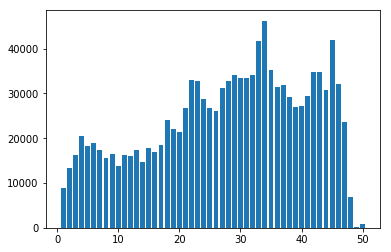

In [516]:
bar_val = from_area_count.groupby('week')

x = bar_val.groups.keys()
y = bar_val['count'].sum()

plt.bar(x,y)

In [466]:
from_area_count[from_area_count['start_time'] == pd.to_datetime('2013-03-22 07:00:00')]

,from_area,start_hour,count,start_time,week
5,2.0,8.0,2,2013-03-22 07:00:00,12
25851,1095.0,9.0,8,2013-03-22 07:00:00,12
28777,1207.0,15.0,1,2013-03-22 07:00:00,12
29768,1262.0,12.0,5,2013-03-22 07:00:00,12
32187,1358.0,8.0,3,2013-03-22 07:00:00,12


In [467]:
from_area_count[from_area_count['start_time'] == pd.to_datetime('2013-01-01 02:00:00')]

,from_area,start_hour,count,start_time,week
798,83.0,1.0,5,2013-01-01 02:00:00,1


In [482]:
from_area_count['count'].describe()

count    34292.00000
mean        31.62551
std         55.27313
min          1.00000
25%          4.00000
50%         10.00000
75%         27.00000
max        261.00000
Name: count, dtype: float64

In [651]:
def previous_rides(day, hour):
    g_rides = df_val.groupby(['day', 'start_hour'])
    
    ride_count = []
    
    try:
        ride_count.append(g_rides.get_group((day, hour-1))['from_area'].count())
    except KeyError:
        ride_count.append(0)
        
    try:
        ride_count.append(g_rides.get_group((day, hour))['from_area'].count())
    except KeyError:
        ride_count.append(0)
        
    try:
        ride_count.append(g_rides.get_group((day, hour+1))['from_area'].count())
    except KeyError:
        ride_count.append(0)
    
    total_rides = 0.5*ride_count[0] + ride_count[1] + 0.5*ride_count[2]
    
    return total_rides

In [659]:
start_date = pd.to_datetime('2013-03-22 20:00:00')
week_no = int(start_date.date().strftime("%V"))
area = 393
hour = start_date.hour

g_surge = from_area_count.groupby(['week', 'from_area', 'start_hour'])
g_surge_week = from_area_count.groupby(['week', 'from_area'])
datee = datetime.datetime.strptime(str(start_date), "%Y-%m-%d %H:%M:%S")

try:
    df_val = g_surge.get_group((week_no, area, hour-1))
    df_val = df_val.append(g_surge.get_group((week_no, area, hour)), 1)
    df_val = df_val.append(g_surge.get_group((week_no, area, hour+1)), 1)
except KeyError:
    pass

In [650]:
df_val['day'] = df_val['start_time'].dt.day

In [790]:
def previous_hours_ride_count(hour, week, area):
    ride_weekly = []
    previous_weeks = [week-i for i in range(1,5)]
    
    for i in previous_weeks:
        ride_count = []
        try:
            ride_count.append(g_surge.get_group((i, area, hour-1))['count'].count())
        except KeyError:
            ride_count.append(0)
        
        try:
            ride_count.append(g_surge.get_group((i, area, hour))['count'].count())
        except KeyError:
            ride_count.append(0)
            
        try:            
            ride_count.append(g_surge.get_group((i, area, hour+1))['count'].count())
        except KeyError:
            ride_count.append(0)
        
        total_rides = (0.5*ride_count[0] + ride_count[1] + 0.5*ride_count[2])/2
        ride_weekly.append(total_rides)
        
        
    ride_avg = sum(ride_weekly) / len(ride_weekly)
    
    return ride_avg

In [791]:
def previous_weeks_ride_count(week, area):
    ride_weekly = []
    previous_weeks = [week-i for i in range(1,5)]
    
    for i in previous_weeks:
        try:
            ride_value = g_surge_week.get_group((i, area))['count'].count()
        except KeyError:
            ride_value = 0
            
        ride_weekly.append(ride_value/24)
        
        
    ride_avg = sum(ride_weekly) / len(ride_weekly)
    
    return ride_avg

In [794]:
hour_val = previous_hours_ride_count(hour, week_no, area) #Stores the value of the number of rides from this hour in past 4 weeks
week_val = previous_weeks_ride_count(week_no, area)  #Stores the value of the avg. past 4 weeks

In [808]:
def surge_algorithm(hour_ride_ct, week_ride_ct, cancel=None):
    surge_multiplier = hour_ride_ct/week_ride_ct
    
    if surge_multiplier <= 1:
        return 1
    
    else:
        #6 is chosen after careful consideration since it does not give a value  very large and neithr
        #does it give a value very small
        surge = surge_multiplier/6
        if cancel:
            surge_cancel = surge/2
            return 1+surge_cancel
        return 1+surge

In [815]:
c = 0.0
if c:
    print(1)
else:
    print(2)


2


In [809]:
surge_algorithm(hour_val, week_val)

1.2469135802469136

In [792]:
previous_hours_ride_count(hour, week_no, area)

2.5

In [793]:
previous_weeks_ride_count(week_no, area)

1.6875

In [812]:
from_area_count.to_excel('fin.xlsx')

In [727]:
g_surge_week.get_group((week_no, 393)).count()

from_area     49
start_hour    49
count         49
start_time    49
week          49
dtype: int64

In [658]:
[datee.day-(i*7) for i in range(1,5)]

[15, 8, 1, -6]

In [652]:
previous_rides(datee.day, hour)

1.0

In [653]:
df_val

,from_area,start_hour,count,start_time,week,day
0,393.0,19.0,2,2013-03-24 19:00:00,12.0,24
1,393.0,19.0,2,2013-03-23 19:30:00,12.0,23
2,393.0,20.0,1,2013-03-24 20:00:00,12.0,24
3,393.0,21.0,5,2013-03-22 21:45:00,12.0,22
4,393.0,21.0,5,2013-03-18 21:30:00,12.0,18
5,393.0,21.0,5,2013-03-21 21:45:00,12.0,21
6,393.0,21.0,5,2013-03-22 21:30:00,12.0,22
7,393.0,21.0,5,2013-03-24 21:30:00,12.0,24


In [633]:
df_val['start_time'].dt.day

0    24
1    23
2    24
3    22
4    18
5    21
6    22
7    24
Name: start_time, dtype: int64

In [616]:
datee = datetime.datetime.strptime(str(start_date), "%Y-%m-%d %H:%M:%S")

In [618]:
type(datee.day)

int

In [493]:
datetime.date(2019, 1, 14).strftime("%V")

'03'

In [518]:
x = pd.to_datetime('2013-03-22 07:00:00')

int(x.date().strftime("%V"))

12

In [522]:
type(x.hour)

int

In [598]:
from_area_count[(from_area_count['from_area'] == 540) & (from_area_count['week'] == 12)]['start_time'].sort_values()

Series([], Name: start_time, dtype: datetime64[ns])

In [532]:
df2.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,booking_time,booking_date,booking_hour,from_time,from_day,from_hour
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,01:39:00,2013-01-01,1,02:00:00,2013-01-01,2
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,02:25:00,2013-01-01,2,09:00:00,2013-01-01,9
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,03:08:00,2013-01-01,3,03:30:00,2013-01-01,3
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,04:39:00,2013-01-01,4,05:45:00,2013-01-01,5
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,07:53:00,2013-01-01,7,09:00:00,2013-01-01,9


In [581]:
import numpy as np

In [775]:
1.0/(3.0+np.exp(-4))

0.3313106114932944

In [784]:
1/(1+2**-0.2)

0.5346019613807635

In [801]:
6/6

1.0

In [687]:
d[1] = 4

In [688]:
d

{1: 4}

In [689]:
d[2] = 3

In [691]:
len(d)

2

In [692]:
d[0.5] = []

In [693]:
d[0.5].append(4)

In [696]:
len(d[0.5])

1

In [810]:
df2

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,booking_time,booking_date,booking_hour,from_time,from_day,from_hour,week
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,01:39:00,2013-01-01,1,02:00:00,2013-01-01,2,1
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,02:25:00,2013-01-01,2,09:00:00,2013-01-01,9,1
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,03:08:00,2013-01-01,3,03:30:00,2013-01-01,3,1
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,04:39:00,2013-01-01,4,05:45:00,2013-01-01,5,1
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,07:53:00,2013-01-01,7,09:00:00,2013-01-01,9,1
5,132518,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,2013-01-01 22:30:00,NaT,0,0,2013-01-01 08:01:00,13.028530,77.546250,12.869805,77.653211,0,08:01:00,2013-01-01,8,22:30:00,2013-01-01,22,1
7,132520,22181,12,NaN,2,1192.0,832.0,NaN,NaN,2013-01-01 11:00:00,NaT,0,0,2013-01-01 09:39:00,12.976770,77.572700,12.880190,77.645580,0,09:39:00,2013-01-01,9,11:00:00,2013-01-01,11,1
9,132522,22184,12,NaN,2,516.0,376.0,NaN,NaN,2013-01-01 11:00:00,NaT,0,0,2013-01-01 09:49:00,13.005600,77.657990,12.902450,77.660810,0,09:49:00,2013-01-01,9,11:00:00,2013-01-01,11,1
10,132523,4941,12,NaN,2,150.0,776.0,NaN,NaN,2013-01-01 11:00:00,NaT,0,0,2013-01-01 09:55:00,12.897240,77.610650,13.015080,77.677960,0,09:55:00,2013-01-01,9,11:00:00,2013-01-01,11,1
11,132524,17037,12,NaN,2,455.0,1330.0,NaN,NaN,2013-01-01 12:45:00,NaT,0,0,2013-01-01 09:59:00,12.999874,77.678120,12.953434,77.706510,0,09:59:00,2013-01-01,9,12:45:00,2013-01-01,12,1


In [816]:
from_area_count.head()

,from_area,start_hour,count,start_time,week
0,25.0,7.0,1,2013-01-06 07:30:00,1.0
1,25.0,19.0,1,2013-01-03 19:30:00,1.0
2,58.0,7.0,1,2013-01-06 07:15:00,1.0
3,58.0,12.0,1,2013-01-02 12:45:00,1.0
4,58.0,17.0,1,2013-01-02 17:30:00,1.0


In [818]:
start_date

Timestamp('2013-03-22 20:00:00')

In [819]:
from_area_count[from_area_count['start_time'] < start_date]['start_time'].max()

Timestamp('2013-03-22 19:45:00')

In [821]:
df2.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,booking_time,booking_date,booking_hour,from_time,from_day,from_hour,week
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,01:39:00,2013-01-01,1,02:00:00,2013-01-01,2,1
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,02:25:00,2013-01-01,2,09:00:00,2013-01-01,9,1
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,03:08:00,2013-01-01,3,03:30:00,2013-01-01,3,1
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,04:39:00,2013-01-01,4,05:45:00,2013-01-01,5,1
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,07:53:00,2013-01-01,7,09:00:00,2013-01-01,9,1


In [823]:
m = [3,1]
m[-5:]

[3, 1]

In [828]:
df1.shape

(1589, 22)

In [829]:
df3.shape

(7550, 22)